# Economic Change Over Three Year Increments

## Table of Contents

*Copy and paste into the find bar to skip to section*

* Importing Dependencies
* 2012-2015 Change
    * 2012-2015: Import Datasets
    * 2012-2015: Feature Selection
    * 2012-2015: Find PCA Score
    * 2012-2015: Find Difference in PCA score
    * 2012-2015: Finding Local Spatial Autocorrelation
    * 2012-2015: K-Means Clustering Around Similar Tracts
    * 2012-2015: Interpreting Clusters **(Adjust Code Accordingly)**
* 2013-2016 Change
    * 2013-2016: Import Datasets
    * 2013-2016: Feature Selection
    * 2013-2016: Find PCA Score
    * 2013-2016: Find Difference in PCA score
    * 2013-2016: Finding Local Spatial Autocorrelation
    * 2013-2016: K-Means Clustering Around Similar Tracts
    * 2013-2016: Interpreting Clusters **(Adjust Code Accordingly)**
* 2014-2017 Change
    * 2014-2017: Import Datasets
    * 2014-2017: Feature Selection
    * 2014-2017: Find PCA Score
    * 2014-2017: Find Difference in PCA score
    * 2014-2017: Finding Local Spatial Autocorrelation
    * 2014-2017: K-Means Clustering Around Similar Tracts
    * 2014-2017: Interpreting Clusters **(Adjust Code Accordingly)**
* 2015-2018 Change
    * 2015-2018: Import Datasets
    * 2015-2018: Feature Selection
    * 2015-2018: Find PCA Score
    * 2015-2018: Find Difference in PCA score
    * 2015-2018: Finding Local Spatial Autocorrelation
    * 2015-2018: K-Means Clustering Around Similar Tracts
    * 2015-2018: Interpreting Clusters **(Adjust Code Accordingly)**
* 2016-2019 Change
    * 2016-2019: Import Datasets
    * 2016-2019: Feature Selection
    * 2016-2019: Find PCA Score
    * 2016-2019: Find Difference in PCA score
    * 2016-2019: Finding Local Spatial Autocorrelation
    * 2016-2019: K-Means Clustering Around Similar Tracts
    * 2016-2019: Interpreting Clusters **(Adjust Code Accordingly)**

## Importing Dependencies

In [2]:
pip install geopandas splot pysal watermark -q

     |████████████████████████████████| 1.0 MB 7.1 MB/s 
     |████████████████████████████████| 16.7 MB 54.6 MB/s 
     |████████████████████████████████| 6.3 MB 75.9 MB/s 
     |████████████████████████████████| 60 kB 9.8 MB/s 
     |████████████████████████████████| 209 kB 95.6 MB/s 
     |████████████████████████████████| 116 kB 94.6 MB/s 
     |████████████████████████████████| 2.4 MB 76.3 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 243 kB 80.3 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 5.7 MB 25.3 MB/s 
     |████████████████████████████████| 147 kB 71.4 MB/s 
     |████████████████████████████████| 41 kB 785 kB/s 
     |████████████████████████████████| 179 kB 89.1 MB/s 
     |████████████████████████████████| 2.1 MB 67.9 MB/s 
     |████████████████████████████████| 78 kB 9.7 MB/s 
     |████████████████████

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn                   #for plotting graphs
from splot import esda as esdaplot
from scipy.spatial.distance import cdist, pdist
import plotly.graph_objects as go #for plotting graphs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from pysal.explore import esda   # Exploratory Spatial analytics
from pysal.lib import weights    # Spatial weights
from shapely import wkt

In [4]:
%reload_ext watermark
%watermark -iv -a 'Max Magid' -u -d -v

Author: Max Magid

Last updated: 2022-08-22

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.9.0

numpy     : 1.21.6
plotly    : 5.5.0
splot     : 1.1.5.post1
esda      : 2.4.3
sklearn   : 1.0.2
seaborn   : 0.11.2
libpysal  : 4.6.2
pandas    : 1.3.5
matplotlib: 3.2.2
geopandas : 0.10.2



## 2012-2015 Change

### 2012-2015: Import Datasets

In [ ]:
df0=pd.read_csv('processed data/acs_12_filled.csv').iloc[:,1:]
df1=pd.read_csv('processed data/acs_15_filled.csv').iloc[:,1:]

### 2012-2015: Feature Selection

We want to find the factors the reveal a good economy

In [ ]:
# Create new datasets with relevant factors from the ACS data
econ0=df0[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')
econ1=df1[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')

In [ ]:
# Combine some categories to make it easier to parse
econ0['percent_educated']=econ0.bachelor_degree_only+econ0.advanced_degree
econ0['not_pov']=1-econ0.percent_poverty
econ0['plus_75k']=(econ0['75k_100k']+econ0['100k_125k']+econ0['125k_150k']+
                   econ0['150k_200k']+econ0['more_than_200k'])

econ1['percent_educated']=econ1.bachelor_degree_only+econ1.advanced_degree
econ1['not_pov']=1-econ1.percent_poverty
econ1['plus_75k']=(econ1['75k_100k']+econ1['100k_125k']+econ1['125k_150k']+
                   econ1['150k_200k']+econ1['more_than_200k'])


In [ ]:
econ0=econ0[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]
econ1=econ1[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]

We will focus on these factors, all of which higher values could indicate a better economy

### 2012-2015: Find PCA Score

In [ ]:
#Concatenate dataframe 0 and dataframe 1 so we can give them a score on the same scale
merged_data=pd.concat([econ0,econ1])

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(merged_data)
dataS=scaler_data.transform(merged_data) 

In [ ]:
#perform PC decomposition over data
pca = PCA(1)
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

In [ ]:
print("The amount of explained variance is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

The amount of explained variance is: 0.54847


In [ ]:
#attach pca score as econ_score column
merged_data['econ_score'] = dataP

In [ ]:
#Split back into separate datasets
econ0_scored = merged_data.iloc[:len(econ0)].reset_index()
econ1_scored = merged_data.iloc[len(econ1):].reset_index()

In [ ]:
#Rename columns for clarity
econ0_scored.rename(columns = {'econ_score':'econ_score_0'}, inplace = True)
econ1_scored.rename(columns = {'econ_score':'econ_score_1'}, inplace = True)

### 2012-2015: Find Difference in PCA score

In [ ]:
# Merge econ scores from year 0 and year 1 by census tract id
merged_scored = pd.merge(econ0_scored[['GEOID','econ_score_0']],
                         econ1_scored[['GEOID','econ_score_1']],
                         on=['GEOID'])

In [ ]:
# Find change in economic score
merged_scored['econ_ind'] = merged_scored.apply(lambda x: x['econ_score_1']-x['econ_score_0'], axis=1)

In [ ]:
merged_scored.head()

,GEOID,econ_score_0,econ_score_1,econ_ind
0,1055010300,-1.387876,-1.358215,0.029661
1,1055000600,-3.601259,-3.125107,0.476152
2,1055010502,-1.076354,-1.398376,-0.322022
3,1055010100,-2.511010,-3.042670,-0.531660
4,1055000300,-4.658143,-3.738111,0.920032


In [ ]:
# Convert the geometry column from a string to a geometry data type
from shapely import wkt
df1['geometry'] = df1['geometry'].apply(wkt.loads)

In [ ]:
# Create new dataset with change in pca score as a column
merged_scored = pd.merge(merged_scored, df1[['GEOID','INTPTLAT','INTPTLON',
                                             'geometry']],
                         left_on='GEOID',right_on='GEOID')

### 2012-2015: Finding Local Spatial Autocorrelation

#### Applying local spatial statistics

In [ ]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(merged_scored, k=8)
# Row-standardization
w.transform = 'R'

In [ ]:
#add spatial weights to econ score
merged_scored['w_econ_ind'] = weights.spatial_lag.lag_spatial(w, merged_scored['econ_ind'])

In [ ]:
# Find deviations from mean, both weighted and otherwise
merged_scored['econ_std'] = ( merged_scored['econ_ind'] - merged_scored['econ_ind'].mean() )
merged_scored['w_econ_std'] = (merged_scored['w_econ_ind'] - merged_scored['w_econ_ind'].mean() )

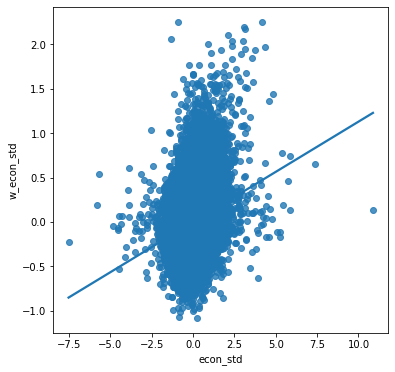

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x='econ_std', y='w_econ_std', data=merged_scored, ci=None
);

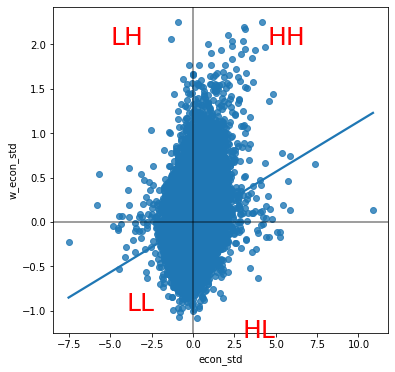

In [ ]:
# Show definition of HH, LH, LL, and HL
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot('econ_std', y='w_econ_std', data=merged_scored, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Add text labels for each quadrant
plt.text(4.5, 2, "HH", fontsize=25, c='r')
plt.text(3, -1.3, "HL", fontsize=25, c='r')
plt.text(-5, 2, "LH", fontsize=25, c='r')
plt.text(-4, -1.0, "LL", fontsize=25, c='r')
# Display
plt.show()

In [ ]:
# Apply local anselin statistics to determine spatial autocorrelation
lisa = esda.moran.Moran_Local(merged_scored['econ_ind'], w)

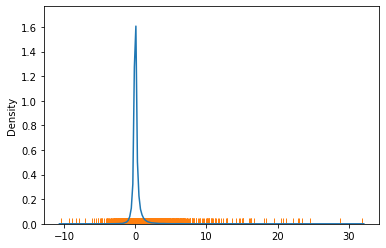

In [ ]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

#### Graphing LISA statisitics

,GEOID,econ_score_0,econ_score_1,econ_ind,GEOID_x,INTPTLAT,INTPTLON,Shape_Length,Shape_Area,GEOID_Data,geometry,w_econ_ind,econ_std,w_econ_std,cl
0,1055010300,-1.387876,-1.358215,0.029661,1055010300,34.015196,-86.146999,0.732176,0.010600,14000US01055010300,(POLYGON ((-86.26845499959853 33.9786400002358...,0.033109,-0.038270,-0.033574,Non-Significant
1,1055000600,-3.601259,-3.125107,0.476152,1055000600,34.015729,-86.060864,0.085330,0.000229,14000US01055000600,(POLYGON ((-86.07272900014323 34.0127419999433...,0.341732,0.408221,0.275049,Non-Significant
2,1055010502,-1.076354,-1.398376,-0.322022,1055010502,33.918413,-85.918333,0.547055,0.005698,14000US01055010502,(POLYGON ((-86.01001500029201 33.8801000003148...,0.049866,-0.389953,-0.016817,Non-Significant
3,1055010100,-2.511010,-3.042670,-0.531660,1055010100,34.064054,-86.066217,0.388058,0.003181,14000US01055010100,(POLYGON ((-86.11238699976019 34.0317250003086...,0.521173,-0.599592,0.454490,Significant
4,1055000300,-4.658143,-3.738111,0.920032,1055000300,34.029813,-86.006323,0.126466,0.000399,14000US01055000300,(POLYGON ((-86.02753899992484 34.0317030001933...,0.226132,0.852101,0.159449,Non-Significant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73986,72005400900,-5.834214,-5.724736,0.109478,72005400900,18.437145,-67.150875,0.056974,0.000096,14000US72005400900,(POLYGON ((-67.15550800009407 18.4418199996932...,0.110755,0.041547,0.044072,Non-Significant
73987,72127008900,-3.050043,-4.227408,-1.177365,72127008900,18.399142,-66.047504,0.034354,0.000047,14000US72127008900,(POLYGON ((-66.05311199971896 18.3967670003967...,-0.547298,-1.245296,-0.613981,Significant
73988,72127009000,-3.536385,-4.025954,-0.489569,72127009000,18.400536,-66.038424,0.032777,0.000031,14000US72127009000,(POLYGON ((-66.0419619999463 18.39833399981427...,-0.585885,-0.557501,-0.652568,Significant
73989,72119130702,-3.545698,-3.449262,0.096437,72119130702,18.354829,-65.844946,0.203992,0.000935,14000US72119130702,(POLYGON ((-65.86800499983082 18.3376160002782...,-0.241127,0.028506,-0.307810,Significant


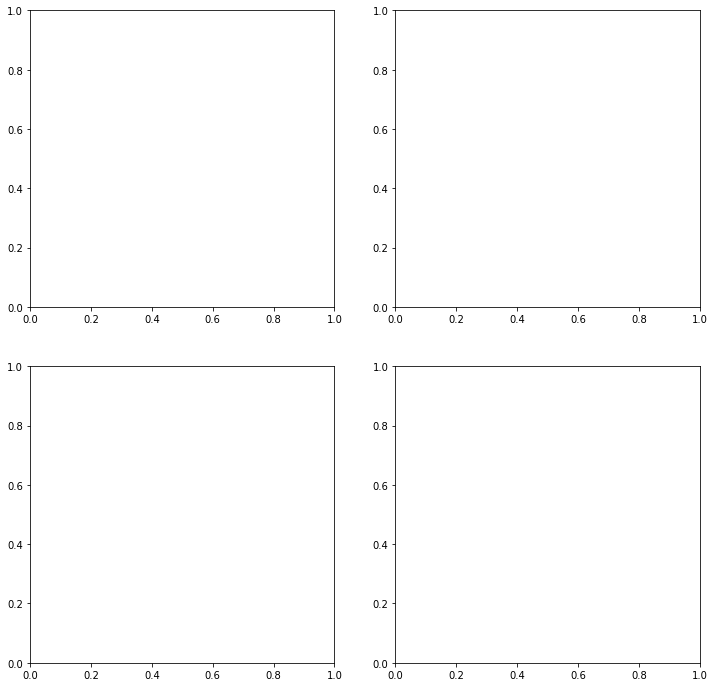

In [ ]:
# Assign new column with local statistics on-the-fly
merged_scored.assign(
    Is=lisa.Is)

# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05), # Assign 1 if significant, 0 otherwise
    index=merged_scored.index           # Use the index in the original data
# Recode 1 to "Significant and 0 to "Non-significant"
).map({1: 'Significant', 0: 'Non-Significant'})
# Assign labels to `db` on the fly
merged_scored.assign(
    cl=labels)

#### Appending to Data Frame

In [ ]:
# Append different groupings to dataframe
counts = pd.value_counts(lisa.q)
counts

3    22947
1    18936
4    16951
2    15157
dtype: int64

In [ ]:
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

17.344001297455097

In [ ]:
# Assign pseudo P-values to `merged_scored`
merged_scored['p-sim'] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
merged_scored['sig'] = sig
# Print top of the table to inspect
merged_scored[['sig','p-sim']].head()

,sig,p-sim
0,0,0.431
1,0,0.061
2,0,0.467
3,1,0.011
4,0,0.196


In [ ]:
# Pick as part of a quadrant only significant polygons, 
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: 'Non-Significant', 1:'HH', 2: 'LH', 3:'LL', 4: 'HL'
}
# Create column in `db` with labels for each polygon
merged_scored['labels'] = pd.Series(
    # First initialise a Series using values and `db` index
    spots, index=merged_scored.index
# Then map each value to corresponding label based 
# on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
merged_scored['labels'].head()

0    Non-Significant
1    Non-Significant
2    Non-Significant
3                 LH
4    Non-Significant
Name: labels, dtype: object

In [ ]:
# Add as label to merged_scored
merged_scored['labels'].value_counts()

Non-Significant    61158
HH                  4466
LL                  3998
HL                  2352
LH                  2017
Name: labels, dtype: int64

In [ ]:
# Create Dummy variables
dummy=pd.get_dummies(merged_scored['labels'])
merged_scored['HH']=dummy['HH']
merged_scored['HL']=dummy['HL']
merged_scored['LH']=dummy['LH']
merged_scored['LL']=dummy['LL']

In [ ]:
# Simply dataframe
merged_scored=merged_scored[['GEOID','econ_score_0','econ_score_1','econ_ind','HH','HL','LH','LL','geometry']]

In [ ]:
merged_scored

,GEOID_x,econ_score_0,econ_score_1,econ_ind,HH,HL,LH,LL,geometry
0,1055010300,-1.387876,-1.358215,0.029661,0,0,0,0,(POLYGON ((-86.26845499959853 33.9786400002358...
1,1055000600,-3.601259,-3.125107,0.476152,0,0,0,0,(POLYGON ((-86.07272900014323 34.0127419999433...
2,1055010502,-1.076354,-1.398376,-0.322022,0,0,0,0,(POLYGON ((-86.01001500029201 33.8801000003148...
3,1055010100,-2.511010,-3.042670,-0.531660,0,0,1,0,(POLYGON ((-86.11238699976019 34.0317250003086...
4,1055000300,-4.658143,-3.738111,0.920032,0,0,0,0,(POLYGON ((-86.02753899992484 34.0317030001933...
...,...,...,...,...,...,...,...,...,...
73986,72005400900,-5.834214,-5.724736,0.109478,0,0,0,0,(POLYGON ((-67.15550800009407 18.4418199996932...
73987,72127008900,-3.050043,-4.227408,-1.177365,0,0,0,1,(POLYGON ((-66.05311199971896 18.3967670003967...
73988,72127009000,-3.536385,-4.025954,-0.489569,0,0,0,1,(POLYGON ((-66.0419619999463 18.39833399981427...
73989,72119130702,-3.545698,-3.449262,0.096437,0,1,0,0,(POLYGON ((-65.86800499983082 18.3376160002782...


### 2012-2015: K-Means Clustering Around Similar Tracts

k-means algorithm is used to isolate clusters of census tracts with similar economic change characteristics

#### Generating Clusters

In [ ]:
ascending_df= merged_scored.copy()

In [ ]:
# merge econ0 and econ1
change_asc_df = econ0.merge(econ1, left_index=True,right_index=True)

In [ ]:
# find differences in columns
for col in econ0:
    if col in ['percentage_employed','civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']:
        change_asc_df['change_'+str(col)] = change_asc_df.apply(lambda x: (x[col+'_y'] - x[col+'_x'])/x[col+'_x'] if x[col+'_x'] > 0 else 0, axis=1)
    else:
        change_asc_df['change_'+str(col)] = change_asc_df[col+'_y'] - change_asc_df[col+'_x']

In [ ]:
#features for gentrified areas to understand the impact
change_asc_df = change_asc_df[['change_percentage_employed',
                               'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']]
spat=merged_scored[['GEOID','HH','HL','LH','LL']]
change_asc_df=change_asc_df.merge(spat,left_index=True,right_on='GEOID')

In [ ]:
change_asc_df=change_asc_df.set_index('GEOID')

In [ ]:
# define elbox test for kmeans
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    #wcss = [sum(d**2) for d in dist]
    #tss = sum(pdist(data)**2)/data.shape[0]
    #bss = tss-wcss
    #
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax.plot(K, bss/tss*100, 'b*-')
    #plt.grid(True)
    #plt.xlabel('Number of clusters')
    #plt.ylabel('Percentage of variance explained')
    #plt.title('Elbow for KMeans clustering')
    #plt.show()

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(change_asc_df)
changeS=scaler_data.transform(change_asc_df) 

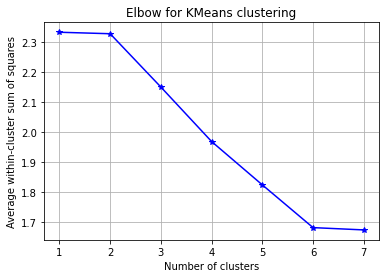

In [ ]:
# find change in sum of squares as number of clusters increase based on changes in variables
elbow(changeS, range(1,8))

Each random state changes the elbow method a little bit as different groupings find local minima, but for every one, n=6 is the best result with the same average sum of squares

In [ ]:
# Select number of clusters and sort dataframe into clusters
rr=KMeans(n_clusters=6, n_init=10, random_state=0).fit(changeS)
rr.labels_ = rr.predict(changeS) #get labels

In [ ]:
# append cluster label to table
change_asc_df['cluster_id'] = rr.labels_
change_asc_df['cluster_id'] = change_asc_df['cluster_id'].astype(str)

In [ ]:
change_asc_df.head()

,change_percentage_employed,change_civilian_labor_force_percentage,change_occupied,change_median_household_income,change_home_value_median,change_median_rent,change_percent_educated,change_not_pov,change_plus_75k,HH,HL,LH,LL,cluster_id
GEOID_x,,,,,,,,,,,,,,
1055010300,-0.029103,-0.083654,-0.035932,0.482517,0.005894,0.148820,-0.280344,0.015876,0.022824,0,0,0,0,0
1055000600,0.153467,0.103719,0.053244,0.304574,0.163507,-0.010340,-0.104025,0.040983,-0.379535,0,0,0,0,0
1055010502,-0.070884,-0.024726,0.003858,-0.026808,-0.095196,-0.047187,0.112189,-0.034362,-0.146478,0,0,0,0,0
1055010100,0.036770,0.034753,-0.086597,-0.059628,-0.125277,0.084829,-0.583703,-0.147414,-0.211446,0,0,1,0,5
1055000300,0.393101,0.188870,-0.028564,0.115221,-0.381139,0.750000,0.040129,0.071643,0.947843,0,0,0,0,0


In [ ]:
# add in geographic data
change_asc_df = pd.merge(change_asc_df, df1[['GEOID','INTPTLAT','INTPTLON','geometry']],
                         left_index=True,right_on='GEOID')

### 2012-2015: Interpreting Clusters (Adjust Code Accordingly)

In [ ]:
change_asc_df['cluster_id'].value_counts()

0    61065
3     4561
1     3997
2     2351
5     2016
4        1
Name: cluster_id, dtype: int64

**The exact group label for each cluster can change each time you run this program. Worth checking and adjusting code below accordingly**

Cluster number 4 is an outlier, so we will disregard it.

Now we need to analyze the 5 other groupings to find what they symbolize

In [ ]:
change_asc_df.columns

Index(['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k', 'HH',
       'HL', 'LH', 'LL', 'cluster_id', 'GEOID_x', 'INTPTLAT', 'INTPTLON',
       'Shape_Length', 'Shape_Area', 'GEOID_Data', 'geometry'],
      dtype='object')

In [ ]:
# Find general statistics for those areas with a positive score
mean_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].mean()).rename(columns={0:'mean'})

std_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].std()).rename(columns={0:'std'})
stat_df=mean_df.merge(std_df, left_index=True,right_index=True)


In [ ]:
#Prepare statistics by cluster
clust=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k','cluster_id']].groupby(by='cluster_id').mean()
clust=clust.swapaxes('index','columns')
clust=clust.merge(stat_df, left_index=True,right_index=True)

#Normalize for graphing purposes
clust['norm0']=(clust['0']-clust['mean'])/clust['std']+1
clust['norm1']=(clust['1']-clust['mean'])/clust['std']+1
clust['norm2']=(clust['2']-clust['mean'])/clust['std']+1
clust['norm3']=(clust['3']-clust['mean'])/clust['std']+1
clust['norm4']=(clust['4']-clust['mean'])/clust['std']+1
clust['norm5']=(clust['5']-clust['mean'])/clust['std']+1

In [ ]:
clust

,0,1,2,3,4,5,mean,std,norm0,norm1,norm2,norm3,norm4,norm5
change_percentage_employed,-0.000991,-0.054154,0.063092,0.055478,94.358491,-0.040075,0.001865,0.371182,0.992307,0.849081,1.164954,1.144440,255.205775,0.887010
change_civilian_labor_force_percentage,-0.012773,-0.058487,0.035764,0.036705,94.358491,-0.042403,-0.010182,0.368463,0.992969,0.868900,1.124697,1.127251,257.114679,0.912553
change_occupied,0.001564,-0.008613,0.007610,0.016950,0.000000,0.001315,0.002148,0.070783,0.991749,0.847979,1.077171,1.209128,0.969658,0.988231
change_median_household_income,0.024404,-0.055656,0.096375,0.186947,-0.019118,-0.047879,0.030416,0.263310,0.977169,0.673118,1.250501,1.594476,0.811880,0.702652
change_home_value_median,-0.006091,-0.059467,0.005961,0.215924,-0.099805,0.015526,0.005682,0.414502,0.971597,0.842827,1.000673,1.507218,0.745510,1.023750
change_median_rent,0.087647,0.021171,0.153203,0.255823,-0.066265,0.042440,0.095272,0.292511,0.973933,0.746673,1.198047,1.548873,0.447757,0.819386
change_percent_educated,0.088155,0.035748,0.183725,0.161797,3.806398,0.022174,0.091153,0.383429,0.992182,0.855501,1.241431,1.184243,10.689516,0.820102
change_not_pov,-0.005632,-0.039960,0.029823,0.039881,-0.021164,-0.036208,-0.004388,0.099435,0.987484,0.642263,1.344054,1.445205,0.831287,0.679997
change_plus_75k,0.077217,-0.029520,0.221585,0.258704,0.000000,-0.022068,0.084519,0.462274,0.984203,0.753308,1.296502,1.376800,0.817167,0.769428


In [ ]:
#Comment out the cluster with only one datapoint

fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=clust.norm0,theta=clust.index,fill='toself',name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=clust.norm1,theta=clust.index,fill='toself',name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=clust.norm2,theta=clust.index,fill='toself',name='Cluster 2'))
fig.add_trace(go.Scatterpolar(r=clust.norm3,theta=clust.index,fill='toself',name='Cluster 3'))
#fig.add_trace(go.Scatterpolar(r=clust.norm4,theta=clust.index,fill='toself',name='Cluster 4'))
fig.add_trace(go.Scatterpolar(r=clust.norm5,theta=clust.index,fill='toself',name='Cluster 5'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 2])),showlegend=True)

fig.show()

**Make changes here based on randomized outcome of kmeans**

This radial chart shows us the relative values for each of the categories we clustered over. Values at a radius of 1 reflect the same average change as the country overall. Clusters 2 and 3 reflect positive change in economic conditions. Cluster 0 reflects a stationary tract. Clusters 1 and 5 reflect tracts in relative economic decline.

To avoid confusion, I will rename the tracts by their relative order of economic advancement:
- Cluster 4 --> Cluster 0
- Cluster 1 --> Cluster 1
- Cluster 5 --> Cluster 2
- Cluster 0 --> Cluster 3
- Cluster 2 --> Cluster 4
- Cluster 3 --> Cluster 5

In [ ]:
# Change code here to get correct results
clust0=clust[['4','1','5','0','2','3']].rename(columns={'0':'3','1':'1','2':'4','3':'5','4':'0','5':'2'})
clust0.iloc[:,1:]

,1,2,3,4,5
change_percentage_employed,-0.054154,-0.040075,-0.000991,0.063092,0.055478
change_civilian_labor_force_percentage,-0.058487,-0.042403,-0.012773,0.035764,0.036705
change_occupied,-0.008613,0.001315,0.001564,0.007610,0.016950
change_median_household_income,-0.055656,-0.047879,0.024404,0.096375,0.186947
change_home_value_median,-0.059467,0.015526,-0.006091,0.005961,0.215924
change_median_rent,0.021171,0.042440,0.087647,0.153203,0.255823
change_percent_educated,0.035748,0.022174,0.088155,0.183725,0.161797
change_not_pov,-0.039960,-0.036208,-0.005632,0.029823,0.039881
change_plus_75k,-0.029520,-0.022068,0.077217,0.221585,0.258704


In [ ]:
# Change code here to get correct results

# We are making a new column with the corrected results where 0 is the outlier, and then the results get 
# more positive moving from 1 to 5.
cluster_sorted=[]
for i in range(len(change_asc_df)):
  if change_asc_df.iloc[i].cluster_id=='0':
    cluster_sorted.append('3')
  elif change_asc_df.iloc[i].cluster_id=='1':
    cluster_sorted.append('1')
  elif change_asc_df.iloc[i].cluster_id=='2':
    cluster_sorted.append('4')
  elif change_asc_df.iloc[i].cluster_id=='3':
    cluster_sorted.append('5')
  elif change_asc_df.iloc[i].cluster_id=='4':
    cluster_sorted.append('0')
  elif change_asc_df.iloc[i].cluster_id=='5':
    cluster_sorted.append('2')
  

change_asc_df['cluster_sorted']=cluster_sorted


#### If correct, the map below should be mostly shaded with group 3

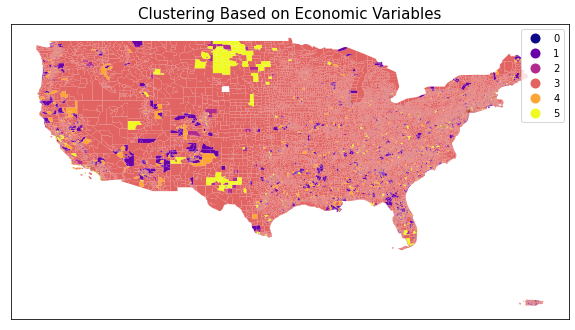

In [ ]:
# Clusters of Ascending Neighborhoods 
plotdf= gpd.GeoDataFrame(change_asc_df).loc[(change_asc_df.INTPTLON<-50)&
                                            (change_asc_df.INTPTLON>-130)]
plotdf.plot(figsize = (10,10), column='cluster_sorted',cmap ="plasma",legend=True)
plt.title("Clustering Based on Economic Variables", fontsize=15)
plt.grid(False)
plt.yticks([])
plt.xticks([])
plt.show()


In [ ]:
change_asc_df.to_csv('processed data/econ_12_to_15.csv')

## 2013-2016 Change

### 2013-2016: Import Datasets

In [ ]:
df0=pd.read_csv('processed data/acs_13_filled.csv').iloc[:,1:]
df1=pd.read_csv('processed data/acs_16_filled.csv').iloc[:,1:]

In [ ]:
len(df0)

73996

In [ ]:
len(df1)

74001

### 2013-2016: Feature Selection

We want to find the factors the reveal a good economy

In [ ]:
df0.columns

Index(['population', 'density', 'median_age', 'median_age_male',
       'median_age_female', 'percent_male', 'percent_female', 'white', 'black',
       'native', 'asian', 'pacific_islander', 'other', 'mixed',
       'white_nonhispanic', 'black_nonhispanic', 'native_nonhispanic',
       'asian_nonhispanic', 'pacific_islander_nonhispanic',
       'other_nonhispanic', 'mixed_nonhispanic', 'hispanic',
       'percent_noncitizen', 'born_in_state', 'born_in_other_state',
       'foreign_born', 'spanish_no_english', 'no_english', 'work_from_home',
       'average_commute', 'under_18', 'over_18', 'highschool_or_less',
       'no_bachelor_degree', 'bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'percent_disabled', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k', 'percentage_food_stamps',
       'percentage_em

In [ ]:
econ0=df0[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')
econ1=df1[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')

In [ ]:
# Combine some categories to make it easier to parse
econ0['percent_educated']=econ0.bachelor_degree_only+econ0.advanced_degree
econ0['not_pov']=1-econ0.percent_poverty
econ0['plus_75k']=(econ0['75k_100k']+econ0['100k_125k']+econ0['125k_150k']+
                   econ0['150k_200k']+econ0['more_than_200k'])

econ1['percent_educated']=econ1.bachelor_degree_only+econ1.advanced_degree
econ1['not_pov']=1-econ1.percent_poverty
econ1['plus_75k']=(econ1['75k_100k']+econ1['100k_125k']+econ1['125k_150k']+
                   econ1['150k_200k']+econ1['more_than_200k'])


In [ ]:
econ1['percent_educated']=econ1.bachelor_degree_only+econ1.advanced_degree
econ1['not_pov']=1-econ1.percent_poverty
econ1['plus_75k']=(econ1['75k_100k']+econ1['100k_125k']+econ1['125k_150k']+
                   econ1['150k_200k']+econ1['more_than_200k'])

In [ ]:
econ0.columns

Index(['bachelor_degree_only', 'advanced_degree', 'percent_poverty',
       'less_than_10k', '10k_15k', '15k_20k', '20k_25k', '25k_30k', '30k_35k',
       '35k_40k', '40k_45k', '45k_50k', '50k_60k', '60k_75k', '75k_100k',
       '100k_125k', '125k_150k', '150k_200k', 'more_than_200k',
       'percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k'],
      dtype='object')

In [ ]:
econ0=econ0[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]
econ1=econ1[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]

We will focus on these factors, all of which higher values could indicate a better economy

### 2013-2016: Find PCA Score

In [ ]:
merged_data=pd.concat([econ0,econ1])

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(merged_data)
dataS=scaler_data.transform(merged_data) 

In [ ]:
#perform PC decomposition over data
pca = PCA(1)
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

In [ ]:
print("The amount of explained variance is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

The amount of explained variance is: 0.55431


In [ ]:
merged_data['econ_score'] = dataP

In [ ]:
econ0_scored = merged_data.iloc[:len(econ0)].reset_index()
econ1_scored = merged_data.iloc[len(econ1):].reset_index()

In [ ]:
econ0_scored.rename(columns = {'econ_score':'econ_score_0'}, inplace = True)
econ1_scored.rename(columns = {'econ_score':'econ_score_1'}, inplace = True)

In [ ]:
econ1_scored.head()

,GEOID,percentage_employed,civilian_labor_force_percentage,occupied,median_household_income,home_value_median,median_rent,percent_educated,not_pov,plus_75k,econ_score_1
0,1055010300,0.496080,0.517857,0.784151,51266.0,112500.0,650.0,0.100054,0.940627,0.219442,-1.554473
1,1055000600,0.506676,0.612150,0.800000,28396.0,46900.0,727.0,0.039967,0.677105,0.049223,-2.776416
2,1055010502,0.440125,0.493744,0.883196,49397.0,110700.0,492.0,0.166828,0.913225,0.263029,-1.587264
3,1055010100,0.505105,0.591592,0.710866,37250.0,77900.0,654.0,0.060976,0.737494,0.107513,-2.566213
4,1055000300,0.465499,0.549894,0.701429,20259.0,35900.0,360.0,0.132976,0.625797,0.083503,-3.546629


### 2013-2016: Find Difference in PCA score

In [ ]:
merged_scored = pd.merge(econ0_scored[['GEOID','econ_score_0']],
                         econ1_scored[['GEOID','econ_score_1']],
                         on=['GEOID'])

In [ ]:
merged_scored['econ_ind'] = merged_scored.apply(lambda x: x['econ_score_1']-x['econ_score_0'], axis=1)


In [ ]:
merged_scored.head()

,GEOID,econ_score_0,econ_score_1,econ_ind
0,1055010300,-1.874966,-1.554473,0.320493
1,1055000600,-3.763893,-2.776416,0.987477
2,1055010502,-1.475567,-1.587264,-0.111697
3,1055010100,-2.649718,-2.566213,0.083505
4,1055000300,-4.661285,-3.546629,1.114656


In [ ]:
df1['geometry'] = df1['geometry'].apply(wkt.loads)

In [ ]:
merged_scored = pd.merge(merged_scored, df1[['GEOID','INTPTLAT','INTPTLON','geometry']],
                         left_on='GEOID',right_on='GEOID')

In [ ]:
#merged_scored= gpd.GeoDataFrame(merged_scored)
#merged_scored.loc[
#(merged_scored.INTPTLON<-50)&(merged_scored.INTPTLON>-130)].plot(
#    figsize = (10,10), column='econ_ind', scheme='Quantiles', k=7,cmap ="plasma",
#    legend=True,legend_kwds={'loc': 'upper left'})
#plt.title("Economic Change across census tracts", fontsize=15)
#plt.grid(False)
#plt.yticks([])
#plt.xticks([])
#plt.show()

### 2013-2016: Finding Local Spatial Autocorrelation

#### Applying local spatial statistics

In [ ]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(merged_scored, k=8)
# Row-standardization
w.transform = 'R'

In [ ]:
merged_scored['w_econ_ind'] = weights.spatial_lag.lag_spatial(w, merged_scored['econ_ind'])

In [ ]:
merged_scored['econ_std'] = ( merged_scored['econ_ind'] - merged_scored['econ_ind'].mean() )
merged_scored['w_econ_std'] = (merged_scored['w_econ_ind'] - merged_scored['w_econ_ind'].mean() )

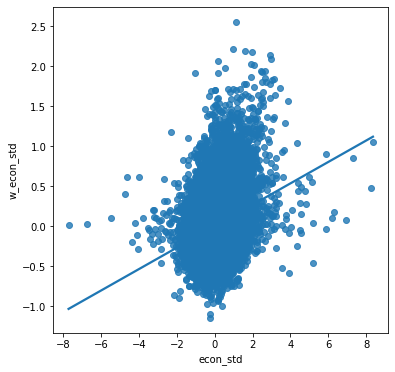

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x='econ_std', y='w_econ_std', data=merged_scored, ci=None
);

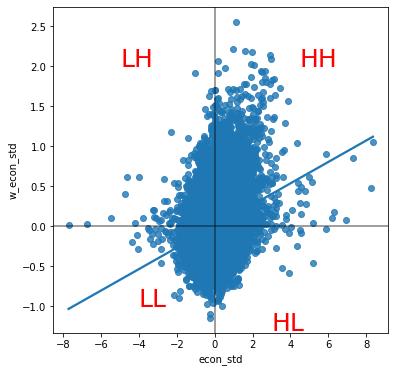

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot('econ_std', y='w_econ_std', data=merged_scored, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Add text labels for each quadrant
plt.text(4.5, 2, "HH", fontsize=25, c='r')
plt.text(3, -1.3, "HL", fontsize=25, c='r')
plt.text(-5, 2, "LH", fontsize=25, c='r')
plt.text(-4, -1.0, "LL", fontsize=25, c='r')
# Display
plt.show()

In [ ]:
lisa = esda.moran.Moran_Local(merged_scored['econ_ind'], w)

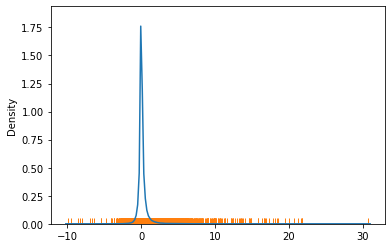

In [ ]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

#### Graphing LISA statisitics

,GEOID,econ_score_0,econ_score_1,econ_ind,GEOID_x,INTPTLAT,INTPTLON,Shape_Length,Shape_Area,GEOID_Data,geometry,w_econ_ind,econ_std,w_econ_std,cl
0,1055010300,-1.874966,-1.554473,0.320493,1055010300,34.015196,-86.146999,0.732176,0.010600,14000US01055010300,(POLYGON ((-86.26845499959853 33.9786400002358...,0.172930,0.135679,-0.011924,Non-Significant
1,1055000600,-3.763893,-2.776416,0.987477,1055000600,34.015729,-86.060864,0.085330,0.000229,14000US01055000600,(POLYGON ((-86.07272900014323 34.0127419999433...,0.443869,0.802663,0.259015,Non-Significant
2,1055010502,-1.475567,-1.587264,-0.111697,1055010502,33.918413,-85.918333,0.547055,0.005698,14000US01055010502,(POLYGON ((-86.01001500029201 33.8801000003148...,0.147002,-0.296511,-0.037852,Non-Significant
3,1055010100,-2.649718,-2.566213,0.083505,1055010100,34.064054,-86.066217,0.388058,0.003181,14000US01055010100,(POLYGON ((-86.11238699976019 34.0317250003086...,0.660913,-0.101309,0.476059,Significant
4,1055000300,-4.661285,-3.546629,1.114656,1055000300,34.029813,-86.006323,0.126466,0.000399,14000US01055000300,(POLYGON ((-86.02753899992484 34.0317030001933...,0.384273,0.929842,0.199419,Non-Significant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73986,72005400900,-5.872211,-5.665415,0.206796,72005400900,18.437145,-67.150875,0.056974,0.000096,14000US72005400900,(POLYGON ((-67.15550800009407 18.4418199996932...,0.209598,0.021981,0.024744,Non-Significant
73987,72127008900,-3.704075,-4.186981,-0.482906,72127008900,18.399142,-66.047504,0.034354,0.000047,14000US72127008900,(POLYGON ((-66.05311199971896 18.3967670003967...,-0.434341,-0.667720,-0.619195,Significant
73988,72127009000,-3.823812,-4.316411,-0.492599,72127009000,18.400536,-66.038424,0.032777,0.000031,14000US72127009000,(POLYGON ((-66.0419619999463 18.39833399981427...,-0.440166,-0.677413,-0.625020,Significant
73989,72119130702,-3.595211,-3.598778,-0.003567,72119130702,18.354829,-65.844946,0.203992,0.000935,14000US72119130702,(POLYGON ((-65.86800499983082 18.3376160002782...,-0.188224,-0.188381,-0.373078,Significant


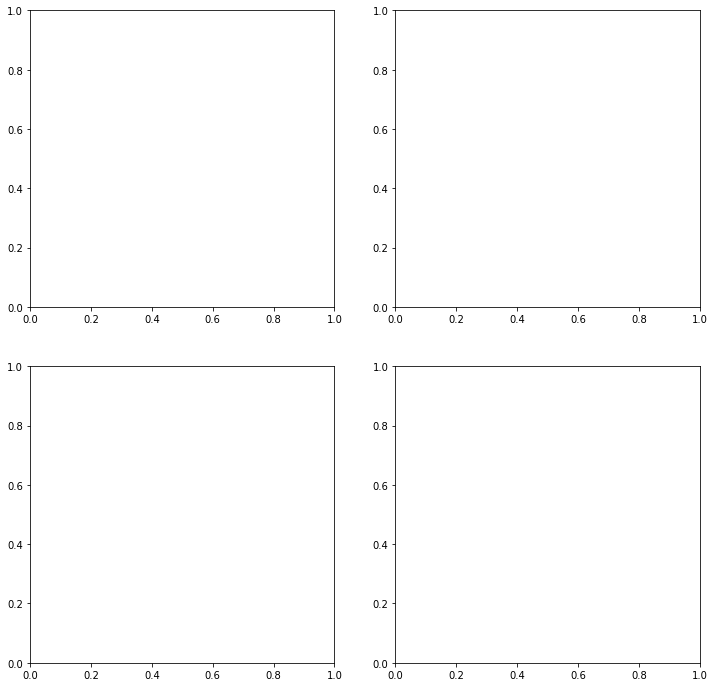

In [ ]:

# Assign new column with local statistics on-the-fly
merged_scored.assign(
    Is=lisa.Is)
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05), # Assign 1 if significant, 0 otherwise
    index=merged_scored.index           # Use the index in the original data
# Recode 1 to "Significant and 0 to "Non-significant"
).map({1: 'Significant', 0: 'Non-Significant'})
# Assign labels to `db` on the fly
merged_scored.assign(
    cl=labels)

#### Appending to Data Frame

In [ ]:
lisa.q[:10]

array([4, 1, 3, 2, 1, 2, 1, 2, 1, 2])

In [ ]:
counts = pd.value_counts(lisa.q)
counts

3    23869
1    18724
4    16812
2    14586
dtype: int64

In [ ]:
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

19.115838412779933

In [ ]:
# Assign pseudo P-values to `merged_scored`
merged_scored['p-sim'] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
merged_scored['sig'] = sig
# Print top of the table to inspect
merged_scored[['sig','p-sim']].head()

,sig,p-sim
0,0,0.483
1,0,0.094
2,0,0.422
3,1,0.013
4,0,0.149


In [ ]:
# Pick as part of a quadrant only significant polygons, 
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: 'Non-Significant', 1:'HH', 2: 'LH', 3:'LL', 4: 'HL'
}
# Create column in `db` with labels for each polygon
merged_scored['labels'] = pd.Series(
    # First initialise a Series using values and `db` index
    spots, index=merged_scored.index
# Then map each value to corresponding label based 
# on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
merged_scored['labels'].head()

0    Non-Significant
1    Non-Significant
2    Non-Significant
3                 LH
4    Non-Significant
Name: labels, dtype: object

In [ ]:
merged_scored['labels'].value_counts()

Non-Significant    59847
HH                  4911
LL                  4592
HL                  2652
LH                  1989
Name: labels, dtype: int64

In [ ]:
dummy=pd.get_dummies(merged_scored['labels'])
merged_scored['HH']=dummy['HH']
merged_scored['HL']=dummy['HL']
merged_scored['LH']=dummy['LH']
merged_scored['LL']=dummy['LL']

In [ ]:
merged_scored=merged_scored[['GEOID','econ_score_0','econ_score_1','econ_ind','HH','HL','LH','LL','geometry']]

In [ ]:
merged_scored

,GEOID_x,econ_score_0,econ_score_1,econ_ind,HH,HL,LH,LL,geometry
0,1055010300,-1.874966,-1.554473,0.320493,0,0,0,0,(POLYGON ((-86.26845499959853 33.9786400002358...
1,1055000600,-3.763893,-2.776416,0.987477,0,0,0,0,(POLYGON ((-86.07272900014323 34.0127419999433...
2,1055010502,-1.475567,-1.587264,-0.111697,0,0,0,0,(POLYGON ((-86.01001500029201 33.8801000003148...
3,1055010100,-2.649718,-2.566213,0.083505,0,0,1,0,(POLYGON ((-86.11238699976019 34.0317250003086...
4,1055000300,-4.661285,-3.546629,1.114656,0,0,0,0,(POLYGON ((-86.02753899992484 34.0317030001933...
...,...,...,...,...,...,...,...,...,...
73986,72005400900,-5.872211,-5.665415,0.206796,0,0,0,0,(POLYGON ((-67.15550800009407 18.4418199996932...
73987,72127008900,-3.704075,-4.186981,-0.482906,0,0,0,1,(POLYGON ((-66.05311199971896 18.3967670003967...
73988,72127009000,-3.823812,-4.316411,-0.492599,0,0,0,1,(POLYGON ((-66.0419619999463 18.39833399981427...
73989,72119130702,-3.595211,-3.598778,-0.003567,0,0,0,1,(POLYGON ((-65.86800499983082 18.3376160002782...


### 2013-2016: K-Means Clustering Around Similar Tracts

k-means algorithm is used to isolate clusters of census tracts with similar economic change characteristics

#### Generating Clusters

In [ ]:
ascending_df= merged_scored

In [ ]:
econ1.head()

,percentage_employed,civilian_labor_force_percentage,occupied,median_household_income,home_value_median,median_rent,percent_educated,not_pov,plus_75k
GEOID_x,,,,,,,,,
1055010700,0.518839,0.537986,0.882848,47429.0,98600.0,724.0,0.124718,0.873513,0.322581
1055001300,0.451451,0.548549,0.764934,28485.0,61300.0,651.0,0.119330,0.677593,0.072008
1055000900,0.362019,0.418701,0.787603,26486.0,46200.0,524.0,0.071286,0.639451,0.077650
1055001700,0.522634,0.569959,0.776786,23250.0,58900.0,565.0,0.150312,0.739282,0.083014
1055010501,0.599256,0.612946,0.892977,65827.0,153300.0,763.0,0.271235,0.960667,0.420724


In [ ]:
change_asc_df = econ0.merge(econ1, left_index=True,right_index=True)

In [ ]:
for col in econ0:
    if col in ['percentage_employed','civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']:
        change_asc_df['change_'+str(col)] = change_asc_df.apply(lambda x: (x[col+'_y'] - x[col+'_x'])/x[col+'_x'] if x[col+'_x'] > 0 else 0, axis=1)
    else:
        change_asc_df['change_'+str(col)] = change_asc_df[col+'_y'] - change_asc_df[col+'_x']

In [ ]:
change_asc_df.columns

Index(['percentage_employed_x', 'civilian_labor_force_percentage_x',
       'occupied_x', 'median_household_income_x', 'home_value_median_x',
       'median_rent_x', 'percent_educated_x', 'not_pov_x', 'plus_75k_x',
       'percentage_employed_y', 'civilian_labor_force_percentage_y',
       'occupied_y', 'median_household_income_y', 'home_value_median_y',
       'median_rent_y', 'percent_educated_y', 'not_pov_y', 'plus_75k_y',
       'change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k'],
      dtype='object')

In [ ]:
#features for gentrified areas to understand the impact
change_asc_df = change_asc_df[['change_percentage_employed',
                               'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']]
spat=merged_scored[['GEOID','HH','HL','LH','LL']]
change_asc_df=change_asc_df.merge(spat,left_index=True,right_on='GEOID')

In [ ]:
change_asc_df=change_asc_df.set_index('GEOID')

In [ ]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    #wcss = [sum(d**2) for d in dist]
    #tss = sum(pdist(data)**2)/data.shape[0]
    #bss = tss-wcss
    #
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax.plot(K, bss/tss*100, 'b*-')
    #plt.grid(True)
    #plt.xlabel('Number of clusters')
    #plt.ylabel('Percentage of variance explained')
    #plt.title('Elbow for KMeans clustering')
    #plt.show()

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(change_asc_df)
changeS=scaler_data.transform(change_asc_df) 

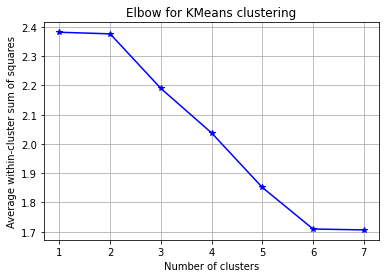

In [ ]:
elbow(changeS, range(1,8))

Each random state changes the elbow method a little bit as different groupings find local minima, but for every one, n=6 is the best result with the same average sum of squares

In [ ]:
rr=KMeans(n_clusters=6, n_init=10, random_state=0).fit(changeS)
rr.labels_ = rr.predict(changeS) #get labels

In [ ]:
change_asc_df['cluster_id'] = rr.labels_
change_asc_df['cluster_id'] = change_asc_df['cluster_id'].astype(str)

In [ ]:
change_asc_df.head()

,change_percentage_employed,change_civilian_labor_force_percentage,change_occupied,change_median_household_income,change_home_value_median,change_median_rent,change_percent_educated,change_not_pov,change_plus_75k,HH,HL,LH,LL,cluster_id
GEOID_x,,,,,,,,,,,,,,
1055010300,0.018905,-0.029223,-0.144023,0.518993,0.336105,0.040000,-0.255399,0.047113,0.920115,0,0,0,0,0
1055000600,0.299774,0.149871,0.039685,0.323021,0.019565,0.134165,-0.226874,0.126702,1.881427,0,0,0,0,0
1055010502,-0.065131,-0.108667,0.030077,0.092975,0.073715,-0.145833,0.026093,0.029756,-0.005860,0,0,0,0,0
1055010100,0.078192,0.082196,-0.106340,0.146154,0.026350,-0.028232,-0.030129,0.026865,-0.226309,0,0,1,0,1
1055000300,0.410886,0.167037,-0.095015,0.307623,-0.187783,-0.072165,0.932578,0.423319,0.557764,0,0,0,0,0


In [ ]:
change_asc_df = pd.merge(change_asc_df, df1[['GEOID','INTPTLAT','INTPTLON','geometry']],
                         left_index=True,right_on='GEOID')

### 2013-2016: Interpreting Clusters **(Adjust Code Accordingly)**

In [ ]:
change_asc_df['cluster_id'].value_counts()

0    59749
4     4983
2     4592
5     2676
1     1989
3        2
Name: cluster_id, dtype: int64

Cluster number 3 is an outlier, so we will disregard it.

Now we need to analyze the 5 other groupings to find what they symbolize

In [ ]:
change_asc_df.columns

Index(['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k', 'HH',
       'HL', 'LH', 'LL', 'cluster_id', 'GEOID_x', 'INTPTLAT', 'INTPTLON',
       'Shape_Length', 'Shape_Area', 'GEOID_Data', 'geometry'],
      dtype='object')

In [ ]:
# Find general statistics for those areas with a positive score
mean_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].mean()).rename(columns={0:'mean'})

std_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].std()).rename(columns={0:'std'})
stat_df=mean_df.merge(std_df, left_index=True,right_index=True)


In [ ]:
#Prepare statistics by cluster
clust=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k','cluster_id']].groupby(by='cluster_id').mean()
clust=clust.swapaxes('index','columns')
clust=clust.merge(stat_df, left_index=True,right_index=True)

#Normalize for graphing purposes
clust['norm0']=(clust['0']-clust['mean'])/clust['std']+1
clust['norm1']=(clust['1']-clust['mean'])/clust['std']+1
clust['norm2']=(clust['2']-clust['mean'])/clust['std']+1
clust['norm3']=(clust['3']-clust['mean'])/clust['std']+1
clust['norm4']=(clust['4']-clust['mean'])/clust['std']+1
clust['norm5']=(clust['5']-clust['mean'])/clust['std']+1

In [ ]:
clust

,0,1,2,3,4,5,mean,std,norm0,norm1,norm2,norm3,norm4,norm5
change_percentage_employed,0.018417,-0.027577,-0.036645,41.369221,0.064958,0.092022,0.020678,0.251370,0.991008,0.808032,0.771959,165.492684,1.176156,1.283824
change_civilian_labor_force_percentage,-0.009439,-0.045820,-0.054151,44.599221,0.031792,0.046082,-0.007201,0.261761,0.991452,0.852466,0.820640,171.408996,1.148964,1.203558
change_occupied,0.003262,0.001021,-0.012450,0.000000,0.013815,0.004163,0.002970,0.063083,1.004632,0.969105,0.755560,0.952923,1.171918,1.018914
change_median_household_income,0.049368,-0.017552,-0.024489,2.077043,0.173761,0.133325,0.054454,0.196233,0.974082,0.633058,0.597705,11.307066,1.607983,1.401925
change_home_value_median,0.043351,0.060615,0.000366,0.108528,0.274391,0.050864,0.056980,0.397636,0.965724,1.009141,0.857623,1.129636,1.546758,0.984618
change_median_rent,0.061811,0.030509,0.019569,-0.038498,0.189914,0.099524,0.068336,0.212356,0.969271,0.821870,0.770352,0.496909,1.572518,1.146864
change_percent_educated,0.093135,0.021257,0.041548,2.067282,0.141427,0.269838,0.097698,0.406266,0.988770,0.811844,0.861791,5.848021,1.107637,1.423713
change_not_pov,0.005893,-0.024912,-0.026287,2.100918,0.050949,0.053658,0.007886,0.197301,0.989897,0.833767,0.826796,11.608345,1.218259,1.231993
change_plus_75k,0.108673,-0.002394,0.005383,0.000000,0.214632,0.372018,0.115934,0.442447,0.983588,0.732559,0.750137,0.737970,1.223072,1.578790


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=clust.norm0,theta=clust.index,fill='toself',name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=clust.norm1,theta=clust.index,fill='toself',name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=clust.norm2,theta=clust.index,fill='toself',name='Cluster 2'))
#fig.add_trace(go.Scatterpolar(r=clust.norm3,theta=clust.index,fill='toself',name='Cluster 3'))
fig.add_trace(go.Scatterpolar(r=clust.norm4,theta=clust.index,fill='toself',name='Cluster 4'))
fig.add_trace(go.Scatterpolar(r=clust.norm5,theta=clust.index,fill='toself',name='Cluster 5'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 2])),showlegend=True)

fig.show()

This radial chart shows us the relative values for each of the categories we clustered over. Values at a radius of 1 reflect the same average change as the country overall. Clusters 4 and 5 reflect positive change in economic conditions. Cluster 3 reflects a declining tract, but one that is the most common cluster of tracts. Clusters 1 and 5 reflect tracts in relative economic decline.

To avoid confusion, I will rename the tracts by their relative order of economic advancement:
- Cluster 3 --> Cluster 0
- Cluster 2 --> Cluster 1
- Cluster 1 --> Cluster 2
- Cluster 0 --> Cluster 3
- Cluster 5 --> Cluster 4
- Cluster 4 --> Cluster 5

In [ ]:
clust0=clust[['3','2','1','0','5','4']].rename(columns={'0':'3','1':'2','2':'1','3':'0','4':'5','5':'4'})
clust0.iloc[:,1:]

,1,2,3,4,5
change_percentage_employed,-0.036645,-0.027577,0.018417,0.092022,0.064958
change_civilian_labor_force_percentage,-0.054151,-0.045820,-0.009439,0.046082,0.031792
change_occupied,-0.012450,0.001021,0.003262,0.004163,0.013815
change_median_household_income,-0.024489,-0.017552,0.049368,0.133325,0.173761
change_home_value_median,0.000366,0.060615,0.043351,0.050864,0.274391
change_median_rent,0.019569,0.030509,0.061811,0.099524,0.189914
change_percent_educated,0.041548,0.021257,0.093135,0.269838,0.141427
change_not_pov,-0.026287,-0.024912,0.005893,0.053658,0.050949
change_plus_75k,0.005383,-0.002394,0.108673,0.372018,0.214632


In [ ]:
cluster_sorted=[]
for i in range(len(change_asc_df)):
  if change_asc_df.iloc[i].cluster_id=='0':
    cluster_sorted.append('3')
  elif change_asc_df.iloc[i].cluster_id=='1':
    cluster_sorted.append('2')
  elif change_asc_df.iloc[i].cluster_id=='2':
    cluster_sorted.append('1')
  elif change_asc_df.iloc[i].cluster_id=='3':
    cluster_sorted.append('0')
  elif change_asc_df.iloc[i].cluster_id=='4':
    cluster_sorted.append('5')
  elif change_asc_df.iloc[i].cluster_id=='5':
    cluster_sorted.append('4')
  

change_asc_df['cluster_sorted']=cluster_sorted


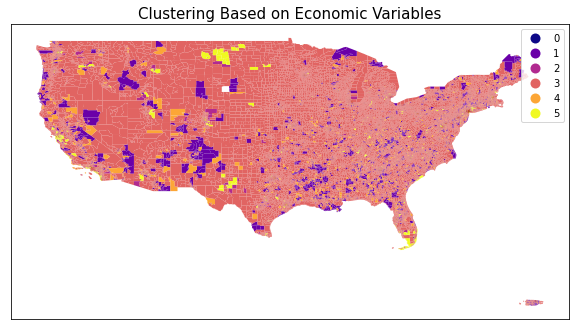

In [ ]:
# Clusters of Ascending Neighborhoods 
plotdf= gpd.GeoDataFrame(change_asc_df).loc[(change_asc_df.INTPTLON<-50)&
                                            (change_asc_df.INTPTLON>-130)]
plotdf.plot(figsize = (10,10), column='cluster_sorted',cmap ="plasma",legend=True)
plt.title("Clustering Based on Economic Variables", fontsize=15)
plt.grid(False)
plt.yticks([])
plt.xticks([])
plt.show()


In [ ]:
change_asc_df.to_csv('processed data/econ_13_to_16.csv')

## 2014-2017 Change

### 2014-2017: Import Datasets

In [ ]:
df0=pd.read_csv('processed data/acs_14_filled.csv').iloc[:,1:]
df1=pd.read_csv('processed data/acs_17_filled.csv').iloc[:,1:]

In [ ]:
len(df0)

73997

In [ ]:
len(df1)

74001

### 2014-2017: Feature Selection

We want to find the factors the reveal a good economy

In [ ]:
df0.columns

Index(['population', 'density', 'median_age', 'median_age_male',
       'median_age_female', 'percent_male', 'percent_female', 'white', 'black',
       'native', 'asian', 'pacific_islander', 'other', 'mixed',
       'white_nonhispanic', 'black_nonhispanic', 'native_nonhispanic',
       'asian_nonhispanic', 'pacific_islander_nonhispanic',
       'other_nonhispanic', 'mixed_nonhispanic', 'hispanic',
       'percent_noncitizen', 'born_in_state', 'born_in_other_state',
       'foreign_born', 'spanish_no_english', 'no_english', 'work_from_home',
       'average_commute', 'under_18', 'over_18', 'highschool_or_less',
       'no_bachelor_degree', 'bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'percent_disabled', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k', 'percentage_food_stamps',
       'percentage_em

In [ ]:
econ0=df0[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')
econ1=df1[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')

In [ ]:
# Combine some categories to make it easier to parse
econ0['percent_educated']=econ0.bachelor_degree_only+econ0.advanced_degree
econ0['not_pov']=1-econ0.percent_poverty
econ0['plus_75k']=(econ0['75k_100k']+econ0['100k_125k']+econ0['125k_150k']+
                   econ0['150k_200k']+econ0['more_than_200k'])

econ1['percent_educated']=econ1.bachelor_degree_only+econ1.advanced_degree
econ1['not_pov']=1-econ1.percent_poverty
econ1['plus_75k']=(econ1['75k_100k']+econ1['100k_125k']+econ1['125k_150k']+
                   econ1['150k_200k']+econ1['more_than_200k'])


In [ ]:
econ1['percent_educated']=econ1.bachelor_degree_only+econ1.advanced_degree
econ1['not_pov']=1-econ1.percent_poverty
econ1['plus_75k']=(econ1['75k_100k']+econ1['100k_125k']+econ1['125k_150k']+
                   econ1['150k_200k']+econ1['more_than_200k'])

In [ ]:
econ0.columns

Index(['bachelor_degree_only', 'advanced_degree', 'percent_poverty',
       'less_than_10k', '10k_15k', '15k_20k', '20k_25k', '25k_30k', '30k_35k',
       '35k_40k', '40k_45k', '45k_50k', '50k_60k', '60k_75k', '75k_100k',
       '100k_125k', '125k_150k', '150k_200k', 'more_than_200k',
       'percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k'],
      dtype='object')

In [ ]:
econ0=econ0[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]
econ1=econ1[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]

We will focus on these factors, all of which higher values could indicate a better economy

### 2014-2017: Find PCA Score

In [ ]:
merged_data=pd.concat([econ0,econ1])

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(merged_data)
dataS=scaler_data.transform(merged_data) 

In [ ]:
#perform PC decomposition over data
pca = PCA(1)
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

In [ ]:
print("The amount of explained variance is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

The amount of explained variance is: 0.55529


In [ ]:
merged_data['econ_score'] = dataP

In [ ]:
econ0_scored = merged_data.iloc[:len(econ0)].reset_index()
econ1_scored = merged_data.iloc[len(econ1):].reset_index()

In [ ]:
econ0_scored.rename(columns = {'econ_score':'econ_score_0'}, inplace = True)
econ1_scored.rename(columns = {'econ_score':'econ_score_1'}, inplace = True)

In [ ]:
econ1_scored.head()

,GEOID,percentage_employed,civilian_labor_force_percentage,occupied,median_household_income,home_value_median,median_rent,percent_educated,not_pov,plus_75k,econ_score_1
0,1055010501,0.613326,0.623945,0.900611,69079.0,159000.0,847.0,0.266700,0.968630,0.458076,0.571770
1,1055010300,0.494511,0.510979,0.769817,52358.0,123300.0,695.0,0.111171,0.930438,0.222772,-1.591386
2,1055000600,0.496835,0.602532,0.833840,26691.0,41100.0,741.0,0.053883,0.653151,0.065614,-2.828453
3,1055010502,0.430069,0.479366,0.852273,55216.0,130800.0,574.0,0.198351,0.896124,0.319487,-1.451375
4,1055010100,0.461287,0.548528,0.728037,37825.0,85500.0,636.0,0.061863,0.738826,0.142490,-2.725648


### 2014-2017: Find Difference in PCA score

In [ ]:
merged_scored = pd.merge(econ0_scored[['GEOID','econ_score_0']],
                         econ1_scored[['GEOID','econ_score_1']],
                         on=['GEOID'])

In [ ]:
merged_scored['econ_ind'] = merged_scored.apply(lambda x: x['econ_score_1']-x['econ_score_0'], axis=1)


In [ ]:
merged_scored.head()

,GEOID,econ_score_0,econ_score_1,econ_ind
0,1055010501,0.083344,0.571770,0.488425
1,1055010300,-1.578983,-1.591386,-0.012403
2,1055000600,-3.659672,-2.828453,0.831220
3,1055010502,-1.449766,-1.451375,-0.001609
4,1055010100,-2.960997,-2.725648,0.235349


In [ ]:
df1['geometry'] = df1['geometry'].apply(wkt.loads)

In [ ]:
merged_scored = pd.merge(merged_scored, df1[['GEOID','INTPTLAT','INTPTLON','geometry']],
                         left_on='GEOID',right_on='GEOID')

In [ ]:
#merged_scored= gpd.GeoDataFrame(merged_scored)
#merged_scored.loc[
#(merged_scored.INTPTLON<-50)&(merged_scored.INTPTLON>-130)].plot(
#    figsize = (10,10), column='econ_ind', scheme='Quantiles', k=7,cmap ="plasma",
#    legend=True,legend_kwds={'loc': 'upper left'})
#plt.title("Economic Change across census tracts", fontsize=15)
#plt.grid(False)
#plt.yticks([])
#plt.xticks([])
#plt.show()

### 2014-2017: Finding Local Spatial Autocorrelation

#### Applying local spatial statistics

In [ ]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(merged_scored, k=8)
# Row-standardization
w.transform = 'R'

In [ ]:
merged_scored['w_econ_ind'] = weights.spatial_lag.lag_spatial(w, merged_scored['econ_ind'])

In [ ]:
merged_scored['econ_std'] = ( merged_scored['econ_ind'] - merged_scored['econ_ind'].mean() )
merged_scored['w_econ_std'] = (merged_scored['w_econ_ind'] - merged_scored['w_econ_ind'].mean() )

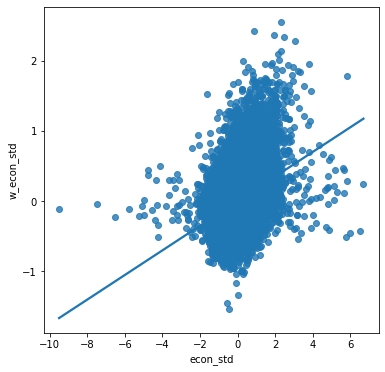

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x='econ_std', y='w_econ_std', data=merged_scored, ci=None
);

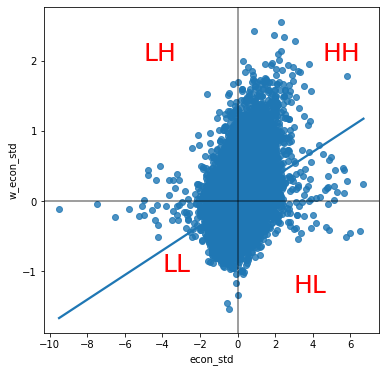

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot('econ_std', y='w_econ_std', data=merged_scored, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Add text labels for each quadrant
plt.text(4.5, 2, "HH", fontsize=25, c='r')
plt.text(3, -1.3, "HL", fontsize=25, c='r')
plt.text(-5, 2, "LH", fontsize=25, c='r')
plt.text(-4, -1.0, "LL", fontsize=25, c='r')
# Display
plt.show()

In [ ]:
lisa = esda.moran.Moran_Local(merged_scored['econ_ind'], w)

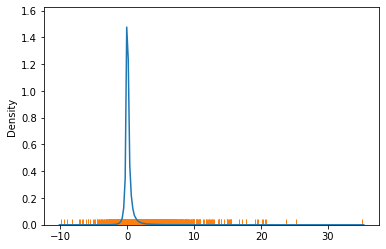

In [ ]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

#### Graphing LISA statisitics

,GEOID,econ_score_0,econ_score_1,econ_ind,GEOID_x,INTPTLAT,INTPTLON,Shape_Length,Shape_Area,GEOID_Data,geometry,w_econ_ind,econ_std,w_econ_std,cl
0,1055010501,0.083344,0.571770,0.488425,1055010501,33.899269,-86.029580,0.415180,0.005596,14000US01055010501,(POLYGON ((-86.07352099979425 33.9054920003555...,0.389029,0.184262,0.083979,Non-Significant
1,1055010300,-1.578983,-1.591386,-0.012403,1055010300,34.015196,-86.146999,0.732176,0.010600,14000US01055010300,(POLYGON ((-86.26845499959853 33.9786400002358...,0.118826,-0.316567,-0.186224,Non-Significant
2,1055000600,-3.659672,-2.828453,0.831220,1055000600,34.015729,-86.060864,0.085330,0.000229,14000US01055000600,(POLYGON ((-86.07272900014323 34.0127419999433...,0.330938,0.527056,0.025888,Non-Significant
3,1055010502,-1.449766,-1.451375,-0.001609,1055010502,33.918413,-85.918333,0.547055,0.005698,14000US01055010502,(POLYGON ((-86.01001500029201 33.8801000003148...,0.262124,-0.305773,-0.042926,Non-Significant
4,1055010100,-2.960997,-2.725648,0.235349,1055010100,34.064054,-86.066217,0.388058,0.003181,14000US01055010100,(POLYGON ((-86.11238699976019 34.0317250003086...,0.384049,-0.068815,0.078999,Non-Significant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73988,72005400900,-5.961324,-5.765433,0.195891,72005400900,18.437145,-67.150875,0.056974,0.000096,14000US72005400900,(POLYGON ((-67.15550800009407 18.4418199996932...,0.207419,-0.108272,-0.097631,Non-Significant
73989,72127008900,-4.050159,-4.943806,-0.893646,72127008900,18.399142,-66.047504,0.034354,0.000047,14000US72127008900,(POLYGON ((-66.05311199971896 18.3967670003967...,-0.326028,-1.197810,-0.631078,Significant
73990,72127009000,-4.029283,-4.687646,-0.658363,72127009000,18.400536,-66.038424,0.032777,0.000031,14000US72127009000,(POLYGON ((-66.0419619999463 18.39833399981427...,-0.381620,-0.962527,-0.686670,Significant
73991,72119130702,-3.610947,-3.564325,0.046622,72119130702,18.354829,-65.844946,0.203992,0.000935,14000US72119130702,(POLYGON ((-65.86800499983082 18.3376160002782...,-0.243431,-0.257542,-0.548481,Significant


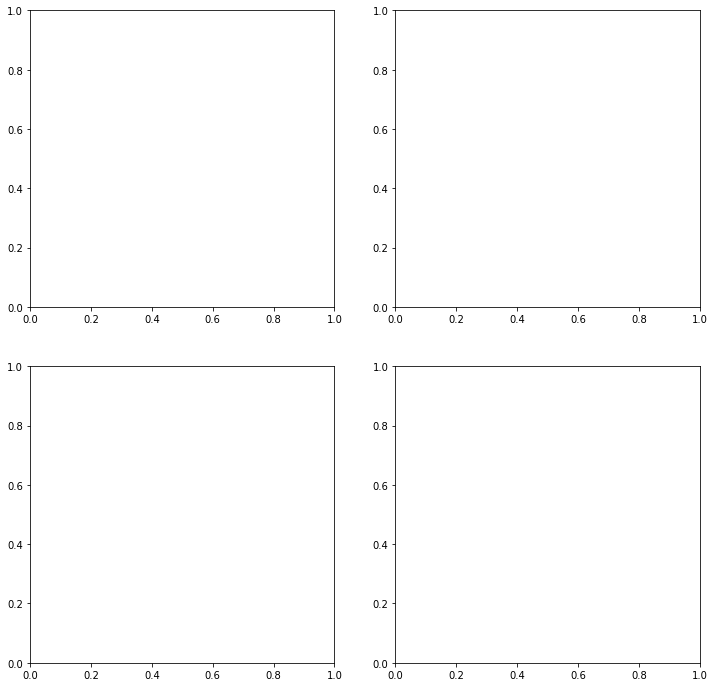

In [ ]:

# Assign new column with local statistics on-the-fly
merged_scored.assign(
    Is=lisa.Is)
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05), # Assign 1 if significant, 0 otherwise
    index=merged_scored.index           # Use the index in the original data
# Recode 1 to "Significant and 0 to "Non-significant"
).map({1: 'Significant', 0: 'Non-Significant'})
# Assign labels to `db` on the fly
merged_scored.assign(
    cl=labels)

#### Appending to Data Frame

In [ ]:
lisa.q[:10]

array([1, 3, 1, 3, 2, 3, 2, 2, 2, 4])

In [ ]:
counts = pd.value_counts(lisa.q)
counts

3    25225
1    19291
4    15858
2    13619
dtype: int64

In [ ]:
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

21.710161772059518

In [ ]:
# Assign pseudo P-values to `merged_scored`
merged_scored['p-sim'] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
merged_scored['sig'] = sig
# Print top of the table to inspect
merged_scored[['sig','p-sim']].head()

,sig,p-sim
0,0,0.303
1,0,0.144
2,0,0.425
3,0,0.411
4,0,0.310


In [ ]:
# Pick as part of a quadrant only significant polygons, 
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: 'Non-Significant', 1:'HH', 2: 'LH', 3:'LL', 4: 'HL'
}
# Create column in `db` with labels for each polygon
merged_scored['labels'] = pd.Series(
    # First initialise a Series using values and `db` index
    spots, index=merged_scored.index
# Then map each value to corresponding label based 
# on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
merged_scored['labels'].head()

0    Non-Significant
1    Non-Significant
2    Non-Significant
3    Non-Significant
4    Non-Significant
Name: labels, dtype: object

In [ ]:
merged_scored['labels'].value_counts()

Non-Significant    57929
HH                  5964
LL                  5408
HL                  2579
LH                  2113
Name: labels, dtype: int64

In [ ]:
dummy=pd.get_dummies(merged_scored['labels'])
merged_scored['HH']=dummy['HH']
merged_scored['HL']=dummy['HL']
merged_scored['LH']=dummy['LH']
merged_scored['LL']=dummy['LL']

In [ ]:
merged_scored=merged_scored[['GEOID','econ_score_0','econ_score_1','econ_ind','HH','HL','LH','LL','geometry']]

In [ ]:
merged_scored

,GEOID_x,econ_score_0,econ_score_1,econ_ind,HH,HL,LH,LL,geometry
0,1055010501,0.083344,0.571770,0.488425,0,0,0,0,(POLYGON ((-86.07352099979425 33.9054920003555...
1,1055010300,-1.578983,-1.591386,-0.012403,0,0,0,0,(POLYGON ((-86.26845499959853 33.9786400002358...
2,1055000600,-3.659672,-2.828453,0.831220,0,0,0,0,(POLYGON ((-86.07272900014323 34.0127419999433...
3,1055010502,-1.449766,-1.451375,-0.001609,0,0,0,0,(POLYGON ((-86.01001500029201 33.8801000003148...
4,1055010100,-2.960997,-2.725648,0.235349,0,0,0,0,(POLYGON ((-86.11238699976019 34.0317250003086...
...,...,...,...,...,...,...,...,...,...
73988,72005400900,-5.961324,-5.765433,0.195891,0,0,0,0,(POLYGON ((-67.15550800009407 18.4418199996932...
73989,72127008900,-4.050159,-4.943806,-0.893646,0,0,0,1,(POLYGON ((-66.05311199971896 18.3967670003967...
73990,72127009000,-4.029283,-4.687646,-0.658363,0,0,0,1,(POLYGON ((-66.0419619999463 18.39833399981427...
73991,72119130702,-3.610947,-3.564325,0.046622,0,0,0,1,(POLYGON ((-65.86800499983082 18.3376160002782...


### 2014-2017: K-Means Clustering Around Similar Tracts

k-means algorithm is used to isolate clusters of census tracts with similar economic change characteristics

#### Generating Clusters

In [ ]:
ascending_df= merged_scored

In [ ]:
econ1.head()

,percentage_employed,civilian_labor_force_percentage,occupied,median_household_income,home_value_median,median_rent,percent_educated,not_pov,plus_75k
GEOID_x,,,,,,,,,
1055010700,0.535022,0.551282,0.873047,50106.0,100800.0,687.0,0.150788,0.901930,0.312453
1055001300,0.421601,0.533396,0.744783,31643.0,60100.0,674.0,0.096336,0.671422,0.119612
1055000900,0.353937,0.397968,0.744873,30833.0,52300.0,609.0,0.098613,0.704130,0.122247
1055001700,0.538725,0.578478,0.819556,22650.0,57100.0,579.0,0.144152,0.723998,0.091021
1055010501,0.613326,0.623945,0.900611,69079.0,159000.0,847.0,0.266700,0.968630,0.458076


In [ ]:
change_asc_df = econ0.merge(econ1, left_index=True,right_index=True)

In [ ]:
for col in econ0:
    if col in ['percentage_employed','civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']:
        change_asc_df['change_'+str(col)] = change_asc_df.apply(lambda x: (x[col+'_y'] - x[col+'_x'])/x[col+'_x'] if x[col+'_x'] > 0 else 0, axis=1)
    else:
        change_asc_df['change_'+str(col)] = change_asc_df[col+'_y'] - change_asc_df[col+'_x']

In [ ]:
change_asc_df.columns

Index(['percentage_employed_x', 'civilian_labor_force_percentage_x',
       'occupied_x', 'median_household_income_x', 'home_value_median_x',
       'median_rent_x', 'percent_educated_x', 'not_pov_x', 'plus_75k_x',
       'percentage_employed_y', 'civilian_labor_force_percentage_y',
       'occupied_y', 'median_household_income_y', 'home_value_median_y',
       'median_rent_y', 'percent_educated_y', 'not_pov_y', 'plus_75k_y',
       'change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k'],
      dtype='object')

In [ ]:
#features for gentrified areas to understand the impact
change_asc_df = change_asc_df[['change_percentage_employed',
                               'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']]
spat=merged_scored[['GEOID','HH','HL','LH','LL']]
change_asc_df=change_asc_df.merge(spat,left_index=True,right_on='GEOID')

In [ ]:
change_asc_df=change_asc_df.set_index('GEOID')

In [ ]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    #wcss = [sum(d**2) for d in dist]
    #tss = sum(pdist(data)**2)/data.shape[0]
    #bss = tss-wcss
    #
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax.plot(K, bss/tss*100, 'b*-')
    #plt.grid(True)
    #plt.xlabel('Number of clusters')
    #plt.ylabel('Percentage of variance explained')
    #plt.title('Elbow for KMeans clustering')
    #plt.show()

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(change_asc_df)
changeS=scaler_data.transform(change_asc_df) 

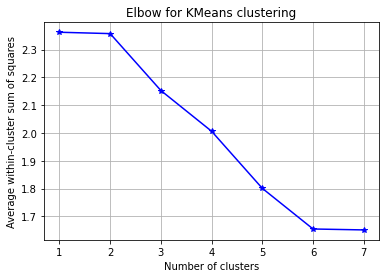

In [ ]:
elbow(changeS, range(1,8))

Each random state changes the elbow method a little bit as different groupings find local minima, but for every one, n=6 is the best result with the same average sum of squares

In [ ]:
rr=KMeans(n_clusters=6, n_init=10, random_state=0).fit(changeS)
rr.labels_ = rr.predict(changeS) #get labels

In [ ]:
change_asc_df['cluster_id'] = rr.labels_
change_asc_df['cluster_id'] = change_asc_df['cluster_id'].astype(str)

In [ ]:
change_asc_df.head()

,change_percentage_employed,change_civilian_labor_force_percentage,change_occupied,change_median_household_income,change_home_value_median,change_median_rent,change_percent_educated,change_not_pov,change_plus_75k,HH,HL,LH,LL,cluster_id
GEOID_x,,,,,,,,,,,,,,
1055010501,0.080686,0.030167,0.019584,0.020550,0.007605,0.146143,0.287168,0.016148,0.024830,0,0,0,0,0
1055010300,-0.023722,-0.065042,-0.140669,0.266951,0.341676,0.113782,-0.188124,0.011647,0.299692,0,0,0,0,0
1055000600,0.183662,0.117740,0.099606,0.060176,-0.138365,0.145286,0.052509,0.086540,2.087940,0,0,0,0,0
1055010502,-0.117237,-0.173557,-0.019145,0.176812,0.330621,0.036101,0.224834,0.022098,0.251325,0,0,0,0,0
1055010100,0.008379,0.027996,-0.006669,0.120741,0.070088,-0.046477,0.241245,0.047740,0.191286,0,0,0,0,0


In [ ]:
change_asc_df = pd.merge(change_asc_df, df1[['GEOID','INTPTLAT','INTPTLON','geometry']],
                         left_index=True,right_on='GEOID')

### 2014-2017:  Interpreting Clusters **(Adjust Code Accordingly)**

In [ ]:
change_asc_df['cluster_id'].value_counts()

0    57828
3     6054
5     5407
1     2590
4     2113
2        1
Name: cluster_id, dtype: int64

Cluster number 2 is an outlier, so we will disregard it.

Now we need to analyze the 5 other groupings to find what they symbolize

In [ ]:
change_asc_df.columns

Index(['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k', 'HH',
       'HL', 'LH', 'LL', 'cluster_id', 'GEOID_x', 'INTPTLAT', 'INTPTLON',
       'Shape_Length', 'Shape_Area', 'GEOID_Data', 'geometry'],
      dtype='object')

In [ ]:
# Find general statistics for those areas with a positive score
mean_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].mean()).rename(columns={0:'mean'})

std_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].std()).rename(columns={0:'std'})
stat_df=mean_df.merge(std_df, left_index=True,right_index=True)


In [ ]:
#Prepare statistics by cluster
clust=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k','cluster_id']].groupby(by='cluster_id').mean()
clust=clust.swapaxes('index','columns')
clust=clust.merge(stat_df, left_index=True,right_index=True)

#Normalize for graphing purposes
clust['norm0']=(clust['0']-clust['mean'])/clust['std']+1
clust['norm1']=(clust['1']-clust['mean'])/clust['std']+1
clust['norm2']=(clust['2']-clust['mean'])/clust['std']+1
clust['norm3']=(clust['3']-clust['mean'])/clust['std']+1
clust['norm4']=(clust['4']-clust['mean'])/clust['std']+1
clust['norm5']=(clust['5']-clust['mean'])/clust['std']+1

In [ ]:
clust

,0,1,2,3,4,5,mean,std,norm0,norm1,norm2,norm3,norm4,norm5
change_percentage_employed,0.025883,0.107426,100.169540,0.074749,-0.020701,-0.027087,0.028888,0.405355,0.992587,1.193751,248.044170,1.113138,0.877665,0.861911
change_civilian_labor_force_percentage,-0.006133,0.061760,106.666667,0.035549,-0.043199,-0.047774,-0.003006,0.423420,0.992615,1.152958,252.924072,1.091056,0.905075,0.894270
change_occupied,0.002962,0.003177,-0.073394,0.011696,0.000370,-0.016242,0.002206,0.060432,1.012515,1.016067,-0.251001,1.157028,0.969621,0.694738
change_median_household_income,0.082483,0.162035,7.631059,0.208742,0.009192,0.003959,0.087869,0.233665,0.976951,1.317400,33.282066,1.517293,0.663292,0.640894
change_home_value_median,0.090885,0.075021,0.196523,0.337166,0.138469,0.028981,0.107317,0.413836,0.960294,0.921959,1.215561,1.555411,1.075278,0.810709
change_median_rent,0.075958,0.110886,0.427406,0.200558,0.053981,0.032862,0.083603,0.195383,0.960871,1.139639,2.759635,1.598592,0.848390,0.740302
change_percent_educated,0.096692,0.187841,0.828298,0.159387,0.042363,0.042543,0.099513,0.394795,0.992853,1.223730,2.845982,1.151657,0.855240,0.855698
change_not_pov,0.015910,0.089964,9.955556,0.045424,-0.017979,-0.016652,0.017704,0.227202,0.992104,1.318044,44.740070,1.122005,0.842946,0.848788
change_plus_75k,0.154124,0.366143,0.000000,0.243188,0.040714,0.056795,0.158479,0.441842,0.990142,1.469996,0.641321,1.191718,0.733467,0.769861


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=clust.norm0,theta=clust.index,fill='toself',name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=clust.norm1,theta=clust.index,fill='toself',name='Cluster 1'))
#fig.add_trace(go.Scatterpolar(r=clust.norm2,theta=clust.index,fill='toself',name='Cluster 2'))
fig.add_trace(go.Scatterpolar(r=clust.norm3,theta=clust.index,fill='toself',name='Cluster 3'))
fig.add_trace(go.Scatterpolar(r=clust.norm4,theta=clust.index,fill='toself',name='Cluster 4'))
fig.add_trace(go.Scatterpolar(r=clust.norm5,theta=clust.index,fill='toself',name='Cluster 5'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 2])),showlegend=True)

fig.show()

This radial chart shows us the relative values for each of the categories we clustered over. Values at a radius of 1 reflect the same average change as the country overall. Clusters 1 and 3 reflect positive change in economic conditions. Cluster 0 reflects a stationary tract. Clusters 4 and 5 reflect tracts in relative economic decline.

To avoid confusion, I will rename the tracts by their relative order of economic advancement:
- Cluster 2 --> Cluster 0
- Cluster 5 --> Cluster 1
- Cluster 4 --> Cluster 2
- Cluster 0 --> Cluster 3
- Cluster 1 --> Cluster 4
- Cluster 3 --> Cluster 5

In [ ]:
clust0=clust[['2','5','4','0','1','3']].rename(columns={'0':'3','1':'4','2':'0','3':'5','4':'2','5':'1'})
clust0.iloc[:,1:]

,1,2,3,4,5
change_percentage_employed,-0.027087,-0.020701,0.025883,0.107426,0.074749
change_civilian_labor_force_percentage,-0.047774,-0.043199,-0.006133,0.061760,0.035549
change_occupied,-0.016242,0.000370,0.002962,0.003177,0.011696
change_median_household_income,0.003959,0.009192,0.082483,0.162035,0.208742
change_home_value_median,0.028981,0.138469,0.090885,0.075021,0.337166
change_median_rent,0.032862,0.053981,0.075958,0.110886,0.200558
change_percent_educated,0.042543,0.042363,0.096692,0.187841,0.159387
change_not_pov,-0.016652,-0.017979,0.015910,0.089964,0.045424
change_plus_75k,0.056795,0.040714,0.154124,0.366143,0.243188


In [ ]:
cluster_sorted=[]
for i in range(len(change_asc_df)):
  if change_asc_df.iloc[i].cluster_id=='0':
    cluster_sorted.append('3')
  elif change_asc_df.iloc[i].cluster_id=='1':
    cluster_sorted.append('4')
  elif change_asc_df.iloc[i].cluster_id=='2':
    cluster_sorted.append('0')
  elif change_asc_df.iloc[i].cluster_id=='3':
    cluster_sorted.append('5')
  elif change_asc_df.iloc[i].cluster_id=='4':
    cluster_sorted.append('2')
  elif change_asc_df.iloc[i].cluster_id=='5':
    cluster_sorted.append('1')
  

change_asc_df['cluster_sorted']=cluster_sorted


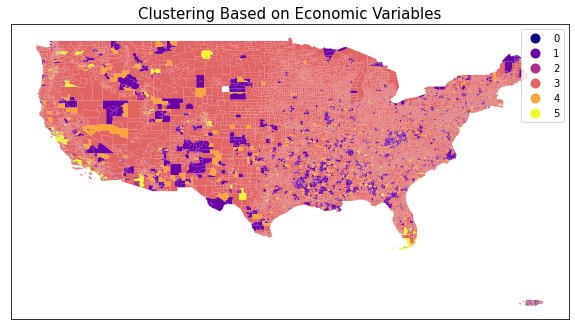

In [ ]:
# Clusters of Ascending Neighborhoods 
plotdf= gpd.GeoDataFrame(change_asc_df).loc[(change_asc_df.INTPTLON<-50)&
                                            (change_asc_df.INTPTLON>-130)]
plotdf.plot(figsize = (10,10), column='cluster_sorted',cmap ="plasma",legend=True)
plt.title("Clustering Based on Economic Variables", fontsize=15)
plt.grid(False)
plt.yticks([])
plt.xticks([])
plt.show()


In [ ]:
change_asc_df.to_csv('processed/econ_14_to_17.csv')

## 2015-2018 Change

### 2015-2018: Import Datasets

In [ ]:
df0=pd.read_csv('processed data/acs_15_filled.csv').iloc[:,1:]
df1=pd.read_csv('processed data/acs_18_filled.csv').iloc[:,1:]

In [ ]:
len(df0)

74001

In [ ]:
len(df1)

74001

### 2015-2018: Feature Selection

We want to find the factors the reveal a good economy

In [ ]:
df0.columns

Index(['population', 'density', 'median_age', 'median_age_male',
       'median_age_female', 'percent_male', 'percent_female', 'white', 'black',
       'native', 'asian', 'pacific_islander', 'other', 'mixed',
       'white_nonhispanic', 'black_nonhispanic', 'native_nonhispanic',
       'asian_nonhispanic', 'pacific_islander_nonhispanic',
       'other_nonhispanic', 'mixed_nonhispanic', 'hispanic',
       'percent_noncitizen', 'born_in_state', 'born_in_other_state',
       'foreign_born', 'spanish_no_english', 'no_english', 'work_from_home',
       'average_commute', 'under_18', 'over_18', 'highschool_or_less',
       'no_bachelor_degree', 'bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'percent_disabled', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k', 'percentage_food_stamps',
       'percentage_em

In [ ]:
econ0=df0[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')
econ1=df1[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')

In [ ]:
# Combine some categories to make it easier to parse
econ0['percent_educated']=econ0.bachelor_degree_only+econ0.advanced_degree
econ0['not_pov']=1-econ0.percent_poverty
econ0['plus_75k']=(econ0['75k_100k']+econ0['100k_125k']+econ0['125k_150k']+
                   econ0['150k_200k']+econ0['more_than_200k'])

econ1['percent_educated']=econ1.bachelor_degree_only+econ1.advanced_degree
econ1['not_pov']=1-econ1.percent_poverty
econ1['plus_75k']=(econ1['75k_100k']+econ1['100k_125k']+econ1['125k_150k']+
                   econ1['150k_200k']+econ1['more_than_200k'])


In [ ]:
econ1['percent_educated']=econ1.bachelor_degree_only+econ1.advanced_degree
econ1['not_pov']=1-econ1.percent_poverty
econ1['plus_75k']=(econ1['75k_100k']+econ1['100k_125k']+econ1['125k_150k']+
                   econ1['150k_200k']+econ1['more_than_200k'])

In [ ]:
econ0.columns

Index(['bachelor_degree_only', 'advanced_degree', 'percent_poverty',
       'less_than_10k', '10k_15k', '15k_20k', '20k_25k', '25k_30k', '30k_35k',
       '35k_40k', '40k_45k', '45k_50k', '50k_60k', '60k_75k', '75k_100k',
       '100k_125k', '125k_150k', '150k_200k', 'more_than_200k',
       'percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k'],
      dtype='object')

In [ ]:
econ0=econ0[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]
econ1=econ1[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]

We will focus on these factors, all of which higher values could indicate a better economy

### 2015-2018: Find PCA Score

In [ ]:
merged_data=pd.concat([econ0,econ1])

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(merged_data)
dataS=scaler_data.transform(merged_data) 

In [ ]:
#perform PC decomposition over data
pca = PCA(1)
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

In [ ]:
print("The amount of explained variance is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

The amount of explained variance is: 0.55130


In [ ]:
merged_data['econ_score'] = dataP

In [ ]:
econ0_scored = merged_data.iloc[:len(econ0)].reset_index()
econ1_scored = merged_data.iloc[len(econ1):].reset_index()

In [ ]:
econ0_scored.rename(columns = {'econ_score':'econ_score_0'}, inplace = True)
econ1_scored.rename(columns = {'econ_score':'econ_score_1'}, inplace = True)

In [ ]:
econ1_scored.head()

,GEOID,percentage_employed,civilian_labor_force_percentage,occupied,median_household_income,home_value_median,median_rent,percent_educated,not_pov,plus_75k,econ_score_1
0,1055010700,0.562058,0.587138,0.877656,46806.0,109800.0,656.0,0.161639,0.889631,0.301541,-1.043169
1,1055001300,0.473960,0.556318,0.839446,30000.0,58700.0,692.0,0.056490,0.619557,0.118447,-2.988584
2,1055000900,0.395708,0.454936,0.717290,30029.0,54100.0,675.0,0.049231,0.804714,0.105320,-3.279124
3,1055001700,0.534067,0.582244,0.777663,26538.0,56300.0,613.0,0.130290,0.730214,0.086436,-2.629985
4,1055010501,0.615695,0.626947,0.881123,71283.0,157100.0,865.0,0.290508,0.931344,0.443473,0.418303


### 2015-2018: Find Difference in PCA score

In [ ]:
merged_scored = pd.merge(econ0_scored[['GEOID','econ_score_0']],
                         econ1_scored[['GEOID','econ_score_1']],
                         on=['GEOID'])

In [ ]:
merged_scored['econ_ind'] = merged_scored.apply(lambda x: x['econ_score_1']-x['econ_score_0'], axis=1)


In [ ]:
merged_scored.head()

,GEOID,econ_score_0,econ_score_1,econ_ind
0,1055010700,-1.388419,-1.043169,0.345250
1,1055001300,-3.010548,-2.988584,0.021964
2,1055000900,-4.047024,-3.279124,0.767901
3,1055001700,-2.177075,-2.629985,-0.452910
4,1055010501,0.392633,0.418303,0.025670


In [ ]:
from shapely import wkt
df1['geometry'] = df1['geometry'].apply(wkt.loads)

In [ ]:
merged_scored = pd.merge(merged_scored, df1[['GEOID','INTPTLAT','INTPTLON','geometry']],
                         left_on='GEOID',right_on='GEOID')

In [ ]:
#merged_scored= gpd.GeoDataFrame(merged_scored)
#merged_scored.loc[
#(merged_scored.INTPTLON<-50)&(merged_scored.INTPTLON>-130)].plot(
#    figsize = (10,10), column='econ_ind', scheme='Quantiles', k=7,cmap ="plasma",
#    legend=True,legend_kwds={'loc': 'upper left'})
#plt.title("Economic Change across census tracts", fontsize=15)
#plt.grid(False)
#plt.yticks([])
#plt.xticks([])
#plt.show()

### 2015-2018: Finding Local Spatial Autocorrelation

#### Applying local spatial statistics

In [ ]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(merged_scored, k=8)
# Row-standardization
w.transform = 'R'

In [ ]:
merged_scored['w_econ_ind'] = weights.spatial_lag.lag_spatial(w, merged_scored['econ_ind'])

In [ ]:
merged_scored['econ_std'] = ( merged_scored['econ_ind'] - merged_scored['econ_ind'].mean() )
merged_scored['w_econ_std'] = (merged_scored['w_econ_ind'] - merged_scored['w_econ_ind'].mean() )

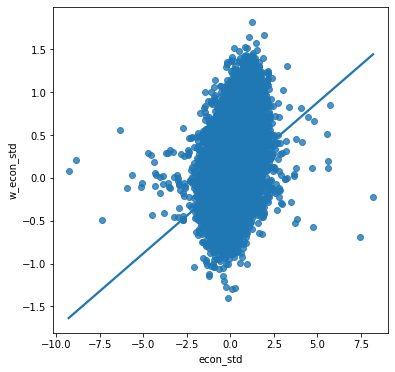

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x='econ_std', y='w_econ_std', data=merged_scored, ci=None
);

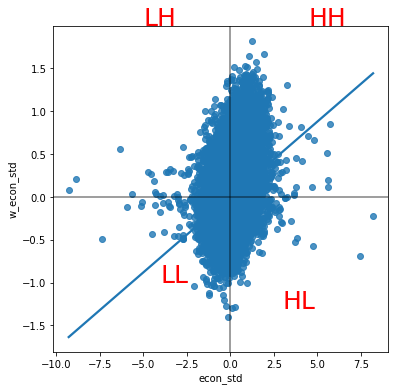

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot('econ_std', y='w_econ_std', data=merged_scored, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Add text labels for each quadrant
plt.text(4.5, 2, "HH", fontsize=25, c='r')
plt.text(3, -1.3, "HL", fontsize=25, c='r')
plt.text(-5, 2, "LH", fontsize=25, c='r')
plt.text(-4, -1.0, "LL", fontsize=25, c='r')
# Display
plt.show()

In [ ]:
lisa = esda.moran.Moran_Local(merged_scored['econ_ind'], w)

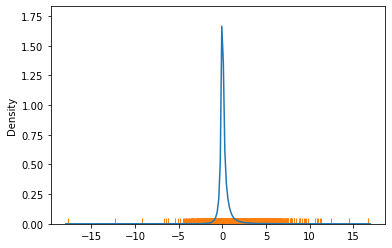

In [ ]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

#### Graphing LISA statisitics

,GEOID,econ_score_0,econ_score_1,econ_ind,GEOID_x,INTPTLAT,INTPTLON,Shape_Length,Shape_Area,GEOID_Data,geometry,w_econ_ind,econ_std,w_econ_std,cl
0,1055010700,-1.388419,-1.043169,0.345250,1055010700,34.072660,-85.899194,0.751245,0.008822,14000US01055010700,(POLYGON ((-85.98698899964256 34.0441349997304...,0.129109,-0.031617,-0.250622,Non-Significant
1,1055001300,-3.010548,-2.988584,0.021964,1055001300,34.007878,-85.986595,0.157251,0.000578,14000US01055001300,(POLYGON ((-86.00068499991278 34.0053699999256...,-0.028658,-0.354904,-0.408389,Significant
2,1055000900,-4.047024,-3.279124,0.767901,1055000900,34.000347,-86.042760,0.190413,0.001237,14000US01055000900,(POLYGON ((-86.07078599957418 34.0001100001763...,-0.169257,0.391033,-0.548988,Significant
3,1055001700,-2.177075,-2.629985,-0.452910,1055001700,33.982531,-85.951838,0.136196,0.000890,14000US01055001700,(POLYGON ((-85.96885299966618 33.9882550002681...,0.402328,-0.829777,0.022596,Non-Significant
4,1055010501,0.392633,0.418303,0.025670,1055010501,33.899269,-86.029580,0.415180,0.005596,14000US01055010501,(POLYGON ((-86.07352099979425 33.9054920003555...,0.417182,-0.351198,0.037451,Non-Significant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72005400900,-5.809289,-5.572382,0.236908,72005400900,18.437145,-67.150875,0.056974,0.000096,14000US72005400900,(POLYGON ((-67.15550800009407 18.4418199996932...,0.019126,-0.139960,-0.360605,Significant
73997,72127008900,-4.325202,-4.908163,-0.582960,72127008900,18.399142,-66.047504,0.034354,0.000047,14000US72127008900,(POLYGON ((-66.05311199971896 18.3967670003967...,-0.116741,-0.959828,-0.496472,Significant
73998,72127009000,-4.121481,-4.306919,-0.185438,72127009000,18.400536,-66.038424,0.032777,0.000031,14000US72127009000,(POLYGON ((-66.0419619999463 18.39833399981427...,-0.194656,-0.562306,-0.574387,Significant
73999,72119130702,-3.557372,-3.730856,-0.173484,72119130702,18.354829,-65.844946,0.203992,0.000935,14000US72119130702,(POLYGON ((-65.86800499983082 18.3376160002782...,-0.095661,-0.550351,-0.475392,Significant


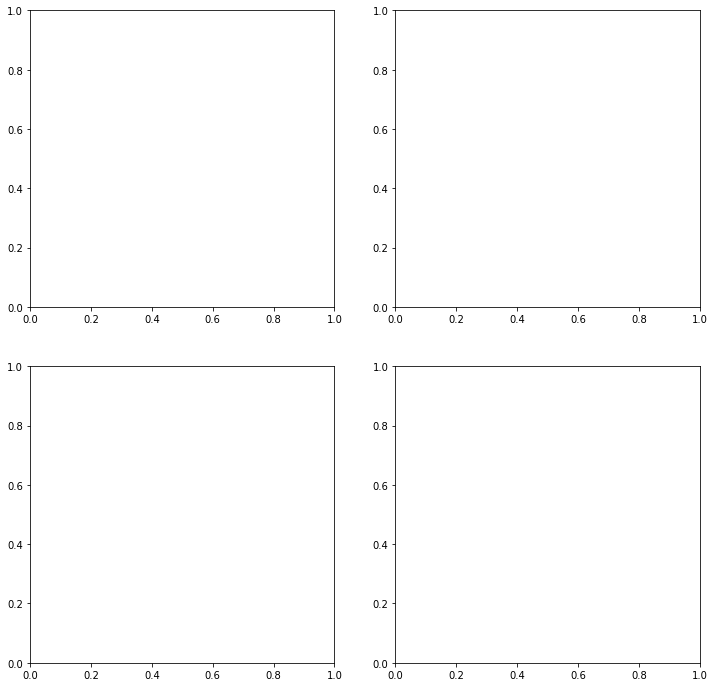

In [ ]:

# Assign new column with local statistics on-the-fly
merged_scored.assign(
    Is=lisa.Is)
labels = pd.Series(
    1 * (lisa.p_sim < 0.05), # Assign 1 if significant, 0 otherwise
    index=merged_scored.index           # Use the index in the original data
# Recode 1 to "Significant and 0 to "Non-significant"
).map({1: 'Significant', 0: 'Non-Significant'})
# Assign labels to `db` on the fly
merged_scored.assign(
    cl=labels)

#### Appending to Data Frame

In [ ]:
lisa.q[:10]

array([3, 3, 4, 2, 2, 2, 4, 4, 4, 3])

In [ ]:
counts = pd.value_counts(lisa.q)
counts

3    24802
1    20177
4    15423
2    13599
dtype: int64

In [ ]:
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

23.183470493641977

In [ ]:
# Assign pseudo P-values to `merged_scored`
merged_scored['p-sim'] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
merged_scored['sig'] = sig
# Print top of the table to inspect
merged_scored[['sig','p-sim']].head()

,sig,p-sim
0,0,0.109
1,1,0.025
2,1,0.007
3,0,0.435
4,0,0.407


In [ ]:
# Pick as part of a quadrant only significant polygons, 
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: 'Non-Significant', 1:'HH', 2: 'LH', 3:'LL', 4: 'HL'
}
# Create column in `db` with labels for each polygon
merged_scored['labels'] = pd.Series(
    # First initialise a Series using values and `db` index
    spots, index=merged_scored.index
# Then map each value to corresponding label based 
# on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
merged_scored['labels'].head()

0    Non-Significant
1                 LL
2                 HL
3    Non-Significant
4    Non-Significant
Name: labels, dtype: object

In [ ]:
merged_scored['labels'].value_counts()

Non-Significant    56845
HH                  6807
LL                  5511
HL                  2450
LH                  2388
Name: labels, dtype: int64

In [ ]:
dummy=pd.get_dummies(merged_scored['labels'])
merged_scored['HH']=dummy['HH']
merged_scored['HL']=dummy['HL']
merged_scored['LH']=dummy['LH']
merged_scored['LL']=dummy['LL']

In [ ]:
merged_scored=merged_scored[['GEOID','econ_score_0','econ_score_1','econ_ind','HH','HL','LH','LL','geometry']]

In [ ]:
merged_scored

,GEOID_x,econ_score_0,econ_score_1,econ_ind,HH,HL,LH,LL,geometry
0,1055010700,-1.388419,-1.043169,0.345250,0,0,0,0,(POLYGON ((-85.98698899964256 34.0441349997304...
1,1055001300,-3.010548,-2.988584,0.021964,0,0,0,1,(POLYGON ((-86.00068499991278 34.0053699999256...
2,1055000900,-4.047024,-3.279124,0.767901,0,1,0,0,(POLYGON ((-86.07078599957418 34.0001100001763...
3,1055001700,-2.177075,-2.629985,-0.452910,0,0,0,0,(POLYGON ((-85.96885299966618 33.9882550002681...
4,1055010501,0.392633,0.418303,0.025670,0,0,0,0,(POLYGON ((-86.07352099979425 33.9054920003555...
...,...,...,...,...,...,...,...,...,...
73996,72005400900,-5.809289,-5.572382,0.236908,0,0,0,1,(POLYGON ((-67.15550800009407 18.4418199996932...
73997,72127008900,-4.325202,-4.908163,-0.582960,0,0,0,1,(POLYGON ((-66.05311199971896 18.3967670003967...
73998,72127009000,-4.121481,-4.306919,-0.185438,0,0,0,1,(POLYGON ((-66.0419619999463 18.39833399981427...
73999,72119130702,-3.557372,-3.730856,-0.173484,0,0,0,1,(POLYGON ((-65.86800499983082 18.3376160002782...


### 2015-2018: K-Means Clustering Around Similar Tracts

k-means algorithm is used to isolate clusters of census tracts with similar economic change characteristics

#### Generating Clusters

In [ ]:
ascending_df= merged_scored

In [ ]:
econ1.head()

,percentage_employed,civilian_labor_force_percentage,occupied,median_household_income,home_value_median,median_rent,percent_educated,not_pov,plus_75k
GEOID_x,,,,,,,,,
1055010700,0.562058,0.587138,0.877656,46806.0,109800.0,656.0,0.161639,0.889631,0.301541
1055001300,0.473960,0.556318,0.839446,30000.0,58700.0,692.0,0.056490,0.619557,0.118447
1055000900,0.395708,0.454936,0.717290,30029.0,54100.0,675.0,0.049231,0.804714,0.105320
1055001700,0.534067,0.582244,0.777663,26538.0,56300.0,613.0,0.130290,0.730214,0.086436
1055010501,0.615695,0.626947,0.881123,71283.0,157100.0,865.0,0.290508,0.931344,0.443473


In [ ]:
change_asc_df = econ0.merge(econ1, left_index=True,right_index=True)

In [ ]:
for col in econ0:
    if col in ['percentage_employed','civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']:
        change_asc_df['change_'+str(col)] = change_asc_df.apply(lambda x: (x[col+'_y'] - x[col+'_x'])/x[col+'_x'] if x[col+'_x'] > 0 else 0, axis=1)
    else:
        change_asc_df['change_'+str(col)] = change_asc_df[col+'_y'] - change_asc_df[col+'_x']

In [ ]:
change_asc_df.columns

Index(['percentage_employed_x', 'civilian_labor_force_percentage_x',
       'occupied_x', 'median_household_income_x', 'home_value_median_x',
       'median_rent_x', 'percent_educated_x', 'not_pov_x', 'plus_75k_x',
       'percentage_employed_y', 'civilian_labor_force_percentage_y',
       'occupied_y', 'median_household_income_y', 'home_value_median_y',
       'median_rent_y', 'percent_educated_y', 'not_pov_y', 'plus_75k_y',
       'change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k'],
      dtype='object')

In [ ]:
#features for gentrified areas to understand the impact
change_asc_df = change_asc_df[['change_percentage_employed',
                               'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']]
spat=merged_scored[['GEOID','HH','HL','LH','LL']]
change_asc_df=change_asc_df.merge(spat,left_index=True,right_on='GEOID')

In [ ]:
change_asc_df=change_asc_df.set_index('GEOID')

In [ ]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    #wcss = [sum(d**2) for d in dist]
    #tss = sum(pdist(data)**2)/data.shape[0]
    #bss = tss-wcss
    #
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax.plot(K, bss/tss*100, 'b*-')
    #plt.grid(True)
    #plt.xlabel('Number of clusters')
    #plt.ylabel('Percentage of variance explained')
    #plt.title('Elbow for KMeans clustering')
    #plt.show()

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(change_asc_df)
changeS=scaler_data.transform(change_asc_df) 

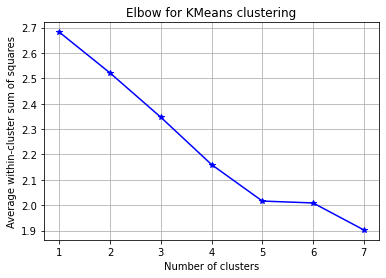

In [ ]:
elbow(changeS, range(1,8))

Each random state changes the elbow method a little bit as different groupings find local minima, but for every one, n=5 is the best result with the same average sum of squares

In [ ]:
rr=KMeans(n_clusters=5, n_init=10, random_state=0).fit(changeS)
rr.labels_ = rr.predict(changeS) #get labels

In [ ]:
change_asc_df['cluster_id'] = rr.labels_
change_asc_df['cluster_id'] = change_asc_df['cluster_id'].astype(str)

In [ ]:
change_asc_df.head()

,change_percentage_employed,change_civilian_labor_force_percentage,change_occupied,change_median_household_income,change_home_value_median,change_median_rent,change_percent_educated,change_not_pov,change_plus_75k,HH,HL,LH,LL,cluster_id
GEOID_x,,,,,,,,,,,,,,
1055010700,0.112150,0.136205,0.008424,-0.016019,0.004575,-0.069504,0.269409,0.020841,-0.094729,0,0,0,0,1
1055001300,0.032740,-0.053148,0.086531,-0.005470,-0.001701,-0.015647,-0.508779,-0.025432,0.604413,0,0,0,1,3
1055000900,0.138005,0.113312,-0.115767,0.341179,0.153518,0.015038,-0.291701,0.400658,0.136115,0,1,0,0,4
1055001700,-0.080072,-0.043845,-0.017841,0.100842,-0.050590,-0.078195,-0.122804,-0.090144,0.000190,0,0,0,0,1
1055010501,-0.019533,-0.025871,-0.032504,0.074413,0.026797,0.108974,0.128644,-0.024539,0.020558,0,0,0,0,1


In [ ]:
change_asc_df = pd.merge(change_asc_df, df1[['GEOID','INTPTLAT','INTPTLON','geometry']],
                         left_index=True,right_on='GEOID')

### 2015-2018: Interpreting Clusters **(Adjust Code Accordingly)**

In [ ]:
change_asc_df['cluster_id'].value_counts()

1    56705
2     6928
3     5511
4     2469
0     2388
Name: cluster_id, dtype: int64

Now we need to analyze the 5 groupings to find what they symbolize

In [ ]:
change_asc_df.columns

Index(['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k', 'HH',
       'HL', 'LH', 'LL', 'cluster_id', 'GEOID_x', 'INTPTLAT', 'INTPTLON',
       'Shape_Length', 'Shape_Area', 'GEOID_Data', 'geometry'],
      dtype='object')

In [ ]:
# Find general statistics for those areas with a positive score
mean_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].mean()).rename(columns={0:'mean'})

std_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].std()).rename(columns={0:'std'})
stat_df=mean_df.merge(std_df, left_index=True,right_index=True)


In [ ]:
#Prepare statistics by cluster
clust=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k','cluster_id']].groupby(by='cluster_id').mean()
clust=clust.swapaxes('index','columns')
clust=clust.merge(stat_df, left_index=True,right_index=True)

#Normalize for graphing purposes
clust['norm0']=(clust['0']-clust['mean'])/clust['std']+1
clust['norm1']=(clust['1']-clust['mean'])/clust['std']+1
clust['norm2']=(clust['2']-clust['mean'])/clust['std']+1
clust['norm3']=(clust['3']-clust['mean'])/clust['std']+1
clust['norm4']=(clust['4']-clust['mean'])/clust['std']+1
#clust['norm5']=(clust['5']-clust['mean'])/clust['std']+1

In [ ]:
clust

,0,1,2,3,4,mean,std,norm0,norm1,norm2,norm3,norm4
change_percentage_employed,-0.020096,0.024103,0.067882,-0.021806,0.136671,0.027112,0.161932,0.708468,0.981417,1.251771,0.697912,1.676570
change_civilian_labor_force_percentage,-0.043385,-0.004560,0.030965,-0.042432,0.094613,-0.001998,0.159510,0.740538,0.983942,1.206655,0.746514,1.605676
change_occupied,0.001738,0.001996,0.009093,-0.019230,0.001411,0.001052,0.060002,1.011433,1.015736,1.134016,0.661984,1.005973
change_median_household_income,0.048217,0.118401,0.236597,0.036597,0.205123,0.124003,0.165084,0.540920,0.966066,1.682039,0.470536,1.491386
change_home_value_median,0.192538,0.118493,0.342969,0.050624,0.112391,0.136640,0.318714,1.175386,0.943062,1.647380,0.730115,0.923918
change_median_rent,0.026424,0.083775,0.186527,0.021352,0.110105,0.087774,0.211111,0.709394,0.981059,1.467778,0.685368,1.105779
change_percent_educated,0.035919,0.093451,0.172870,0.048944,0.179926,0.098601,0.350825,0.821332,0.985322,1.211700,0.858457,1.231810
change_not_pov,-0.008006,0.019769,0.053177,-0.010199,0.085990,0.021978,0.113854,0.736639,0.980599,1.274024,0.717378,1.562234
change_plus_75k,0.073014,0.205400,0.322529,0.118927,0.438876,0.213444,0.469586,0.700950,0.982871,1.232302,0.798724,1.480067


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=clust.norm0,theta=clust.index,fill='toself',name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=clust.norm1,theta=clust.index,fill='toself',name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=clust.norm2,theta=clust.index,fill='toself',name='Cluster 2'))
fig.add_trace(go.Scatterpolar(r=clust.norm3,theta=clust.index,fill='toself',name='Cluster 3'))
fig.add_trace(go.Scatterpolar(r=clust.norm4,theta=clust.index,fill='toself',name='Cluster 4'))
#fig.add_trace(go.Scatterpolar(r=clust.norm5,theta=clust.index,fill='toself',name='Cluster 5'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 2])),showlegend=True)

fig.show()

This radial chart shows us the relative values for each of the categories we clustered over. Values at a radius of 1 reflect the same average change as the country overall. Clusters 2 and 4 reflect positive change in economic conditions. Cluster 1 reflects a stationary tract. Cluster 0 and 3 reflect tracts in relative economic decline.

To avoid confusion, I will rename the tracts by their relative order of economic advancement:
- Cluster 3 --> Cluster 1
- Cluster 0 --> Cluster 2
- Cluster 1 --> Cluster 3
- Cluster 4 --> Cluster 4
- Cluster 2 --> Cluster 5

In [ ]:
clust0=clust[['3','0','1','4','2']].rename(columns={'0':'2','1':'3','2':'5','3':'1','4':'4'})
clust0

,1,2,3,4,5
change_percentage_employed,-0.021806,-0.020096,0.024103,0.136671,0.067882
change_civilian_labor_force_percentage,-0.042432,-0.043385,-0.004560,0.094613,0.030965
change_occupied,-0.019230,0.001738,0.001996,0.001411,0.009093
change_median_household_income,0.036597,0.048217,0.118401,0.205123,0.236597
change_home_value_median,0.050624,0.192538,0.118493,0.112391,0.342969
change_median_rent,0.021352,0.026424,0.083775,0.110105,0.186527
change_percent_educated,0.048944,0.035919,0.093451,0.179926,0.172870
change_not_pov,-0.010199,-0.008006,0.019769,0.085990,0.053177
change_plus_75k,0.118927,0.073014,0.205400,0.438876,0.322529


In [ ]:
cluster_sorted=[]
for i in range(len(change_asc_df)):
  if change_asc_df.iloc[i].cluster_id=='0':
    cluster_sorted.append('2')
  elif change_asc_df.iloc[i].cluster_id=='1':
    cluster_sorted.append('3')
  elif change_asc_df.iloc[i].cluster_id=='2':
    cluster_sorted.append('5')
  elif change_asc_df.iloc[i].cluster_id=='3':
    cluster_sorted.append('1')
  elif change_asc_df.iloc[i].cluster_id=='4':
    cluster_sorted.append('4')
  

change_asc_df['cluster_sorted']=cluster_sorted


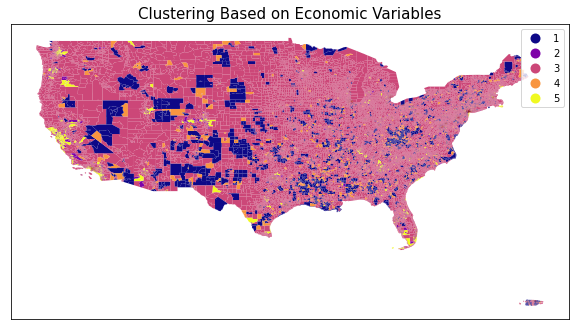

In [ ]:
# Clusters of Ascending Neighborhoods 
plotdf= gpd.GeoDataFrame(change_asc_df).loc[(change_asc_df.INTPTLON<-50)&
                                            (change_asc_df.INTPTLON>-130)]
plotdf.plot(figsize = (10,10), column='cluster_sorted',cmap ="plasma",legend=True)
plt.title("Clustering Based on Economic Variables", fontsize=15)
plt.grid(False)
plt.yticks([])
plt.xticks([])
plt.show()


In [ ]:
change_asc_df.to_csv('processed data/econ_15_to_18.csv')

## 2016-2019 Change

### 2016-2019: Import Datasets

In [ ]:
df0=pd.read_csv('processed data/acs_16_filled.csv').iloc[:,1:]
df1=pd.read_csv('processed data/acs_19_filled.csv').iloc[:,1:]

In [ ]:
len(df0)

74001

In [ ]:
len(df1)

74001

### 2016-2019: Feature Selection

We want to find the factors the reveal a good economy

In [ ]:
df0.columns

Index(['population', 'density', 'median_age', 'median_age_male',
       'median_age_female', 'percent_male', 'percent_female', 'white', 'black',
       'native', 'asian', 'pacific_islander', 'other', 'mixed',
       'white_nonhispanic', 'black_nonhispanic', 'native_nonhispanic',
       'asian_nonhispanic', 'pacific_islander_nonhispanic',
       'other_nonhispanic', 'mixed_nonhispanic', 'hispanic',
       'percent_noncitizen', 'born_in_state', 'born_in_other_state',
       'foreign_born', 'spanish_no_english', 'no_english', 'work_from_home',
       'average_commute', 'under_18', 'over_18', 'highschool_or_less',
       'no_bachelor_degree', 'bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'percent_disabled', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k', 'percentage_food_stamps',
       'percentage_em

In [ ]:
econ0=df0[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')
econ1=df1[['GEOID','bachelor_degree_only', 'advanced_degree',
       'percent_poverty', 'less_than_10k', '10k_15k',
       '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_45k',
       '45k_50k', '50k_60k', '60k_75k', '75k_100k', '100k_125k', '125k_150k',
       '150k_200k', 'more_than_200k','percentage_employed',
       'civilian_labor_force_percentage','occupied','median_household_income',
       'home_value_median','median_rent']].set_index('GEOID')

In [ ]:
# Combine some categories to make it easier to parse
econ0['percent_educated']=econ0.bachelor_degree_only+econ0.advanced_degree
econ0['not_pov']=1-econ0.percent_poverty
econ0['plus_75k']=(econ0['75k_100k']+econ0['100k_125k']+econ0['125k_150k']+
                   econ0['150k_200k']+econ0['more_than_200k'])

econ1['percent_educated']=econ1.bachelor_degree_only+econ1.advanced_degree
econ1['not_pov']=1-econ1.percent_poverty
econ1['plus_75k']=(econ1['75k_100k']+econ1['100k_125k']+econ1['125k_150k']+
                   econ1['150k_200k']+econ1['more_than_200k'])


In [ ]:
econ1['percent_educated']=econ1.bachelor_degree_only+econ1.advanced_degree
econ1['not_pov']=1-econ1.percent_poverty
econ1['plus_75k']=(econ1['75k_100k']+econ1['100k_125k']+econ1['125k_150k']+
                   econ1['150k_200k']+econ1['more_than_200k'])

In [ ]:
econ0.columns

Index(['bachelor_degree_only', 'advanced_degree', 'percent_poverty',
       'less_than_10k', '10k_15k', '15k_20k', '20k_25k', '25k_30k', '30k_35k',
       '35k_40k', '40k_45k', '45k_50k', '50k_60k', '60k_75k', '75k_100k',
       '100k_125k', '125k_150k', '150k_200k', 'more_than_200k',
       'percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k'],
      dtype='object')

In [ ]:
econ0=econ0[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]
econ1=econ1[['percentage_employed', 'civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']]

We will focus on these factors, all of which higher values could indicate a better economy

### 2016-2019: Find PCA Score

In [ ]:
merged_data=pd.concat([econ0,econ1])

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(merged_data)
dataS=scaler_data.transform(merged_data) 

In [ ]:
#perform PC decomposition over data
pca = PCA(1)
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

In [ ]:
print("The amount of explained variance is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

The amount of explained variance is: 0.55313


In [ ]:
merged_data['econ_score'] = dataP

In [ ]:
econ0_scored = merged_data.iloc[:len(econ0)].reset_index()
econ1_scored = merged_data.iloc[len(econ1):].reset_index()

In [ ]:
econ0_scored.rename(columns = {'econ_score':'econ_score_0'}, inplace = True)
econ1_scored.rename(columns = {'econ_score':'econ_score_1'}, inplace = True)

In [ ]:
econ1_scored.head()

,GEOID,percentage_employed,civilian_labor_force_percentage,occupied,median_household_income,home_value_median,median_rent,percent_educated,not_pov,plus_75k,econ_score_1
0,1055010700,0.569550,0.593080,0.870335,46078.0,104500.0,688.0,0.162763,0.908089,0.235465,-1.191842
1,1055001300,0.540990,0.580990,0.837423,22946.0,58000.0,691.0,0.059155,0.603696,0.081502,-3.032606
2,1055000900,0.435885,0.451789,0.688123,30238.0,61700.0,678.0,0.054484,0.856515,0.120267,-3.108924
3,1055001700,0.528799,0.589868,0.720759,24462.0,55600.0,610.0,0.134039,0.692628,0.096491,-2.903850
4,1055010501,0.602016,0.619870,0.907801,73248.0,153100.0,942.0,0.303926,0.926786,0.476562,0.459821


### 2016-2019: Find Difference in PCA score

In [ ]:
merged_scored = pd.merge(econ0_scored[['GEOID','econ_score_0']],
                         econ1_scored[['GEOID','econ_score_1']],
                         on=['GEOID'])

In [ ]:
merged_scored['econ_ind'] = merged_scored.apply(lambda x: x['econ_score_1']-x['econ_score_0'], axis=1)


In [ ]:
merged_scored.head()

,GEOID,econ_score_0,econ_score_1,econ_ind
0,1055010700,-1.388181,-1.191842,0.196340
1,1055001300,-3.165157,-3.032606,0.132551
2,1055000900,-4.012508,-3.108924,0.903584
3,1055001700,-2.785676,-2.903850,-0.118174
4,1055010501,0.089409,0.459821,0.370412


In [ ]:
from shapely import wkt
df1['geometry'] = df1['geometry'].apply(wkt.loads)

In [ ]:
merged_scored = pd.merge(merged_scored, df1[['GEOID','INTPTLAT','INTPTLON','geometry']],
                         left_on='GEOID',right_on='GEOID')

In [ ]:
#merged_scored= gpd.GeoDataFrame(merged_scored)
#merged_scored.loc[
#(merged_scored.INTPTLON<-50)&(merged_scored.INTPTLON>-130)].plot(
#    figsize = (10,10), column='econ_ind', scheme='Quantiles', k=7,cmap ="plasma",
#    legend=True,legend_kwds={'loc': 'upper left'})
#plt.title("Economic Change across census tracts", fontsize=15)
#plt.grid(False)
#plt.yticks([])
#plt.xticks([])
#plt.show()

### 2016-2019: Finding Local Spatial Autocorrelation

#### Applying local spatial statistics

In [ ]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(merged_scored, k=8)
# Row-standardization
w.transform = 'R'

In [ ]:
merged_scored['w_econ_ind'] = weights.spatial_lag.lag_spatial(w, merged_scored['econ_ind'])

In [ ]:
merged_scored['econ_std'] = ( merged_scored['econ_ind'] - merged_scored['econ_ind'].mean() )
merged_scored['w_econ_std'] = (merged_scored['w_econ_ind'] - merged_scored['w_econ_ind'].mean() )

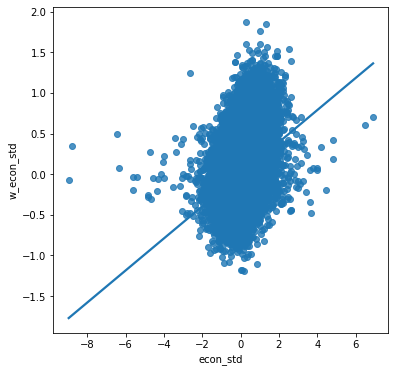

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x='econ_std', y='w_econ_std', data=merged_scored, ci=None
);

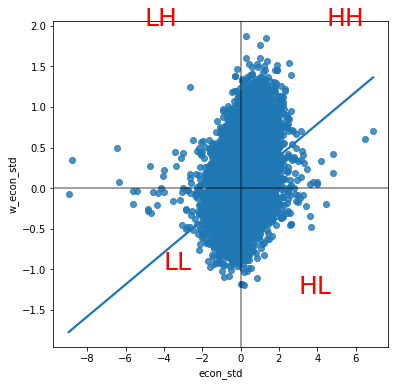

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot('econ_std', y='w_econ_std', data=merged_scored, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Add text labels for each quadrant
plt.text(4.5, 2, "HH", fontsize=25, c='r')
plt.text(3, -1.3, "HL", fontsize=25, c='r')
plt.text(-5, 2, "LH", fontsize=25, c='r')
plt.text(-4, -1.0, "LL", fontsize=25, c='r')
# Display
plt.show()

In [ ]:
lisa = esda.moran.Moran_Local(merged_scored['econ_ind'], w)

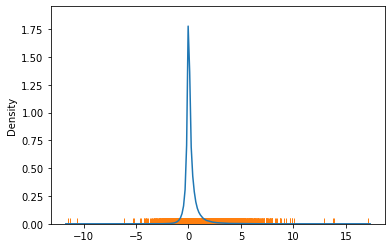

In [ ]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

#### Graphing LISA statisitics

,GEOID,econ_score_0,econ_score_1,econ_ind,GEOID_x,INTPTLAT,INTPTLON,Shape_Length,Shape_Area,GEOID_Data,geometry,w_econ_ind,econ_std,w_econ_std,cl
0,1055010700,-1.388181,-1.191842,0.196340,1055010700,34.072660,-85.899194,0.751245,0.008822,14000US01055010700,(POLYGON ((-85.98698899964256 34.0441349997304...,0.120980,-0.242004,-0.320275,Significant
1,1055001300,-3.165157,-3.032606,0.132551,1055001300,34.007878,-85.986595,0.157251,0.000578,14000US01055001300,(POLYGON ((-86.00068499991278 34.0053699999256...,0.030635,-0.305793,-0.410619,Significant
2,1055000900,-4.012508,-3.108924,0.903584,1055000900,34.000347,-86.042760,0.190413,0.001237,14000US01055000900,(POLYGON ((-86.07078599957418 34.0001100001763...,-0.065215,0.465241,-0.506469,Significant
3,1055001700,-2.785676,-2.903850,-0.118174,1055001700,33.982531,-85.951838,0.136196,0.000890,14000US01055001700,(POLYGON ((-85.96885299966618 33.9882550002681...,0.461012,-0.556518,0.019757,Non-Significant
4,1055010501,0.089409,0.459821,0.370412,1055010501,33.899269,-86.029580,0.415180,0.005596,14000US01055010501,(POLYGON ((-86.07352099979425 33.9054920003555...,0.548093,-0.067932,0.106839,Non-Significant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72005400900,-5.814447,-5.659921,0.154526,72005400900,18.437145,-67.150875,0.056974,0.000096,14000US72005400900,(POLYGON ((-67.15550800009407 18.4418199996932...,0.050660,-0.283818,-0.390595,Significant
73997,72127008900,-4.363173,-4.948442,-0.585269,72127008900,18.399142,-66.047504,0.034354,0.000047,14000US72127008900,(POLYGON ((-66.05311199971896 18.3967670003967...,0.092934,-1.023613,-0.348320,Significant
73998,72127009000,-4.480916,-4.471572,0.009344,72127009000,18.400536,-66.038424,0.032777,0.000031,14000US72127009000,(POLYGON ((-66.0419619999463 18.39833399981427...,-0.106118,-0.429000,-0.547372,Significant
73999,72119130702,-3.767468,-3.744679,0.022788,72119130702,18.354829,-65.844946,0.203992,0.000935,14000US72119130702,(POLYGON ((-65.86800499983082 18.3376160002782...,0.061617,-0.415555,-0.379637,Significant


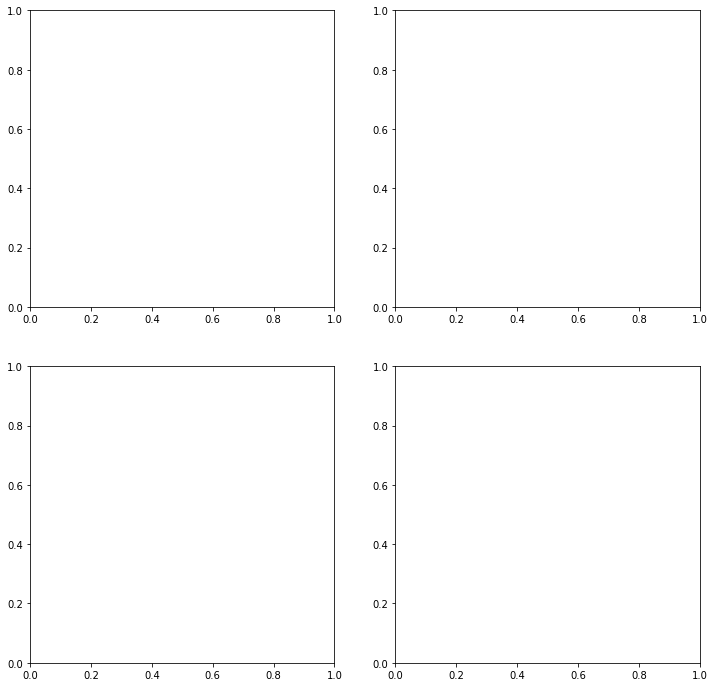

In [ ]:

# Assign new column with local statistics on-the-fly
merged_scored.assign(
    Is=lisa.Is)
labels = pd.Series(
    1 * (lisa.p_sim < 0.05), # Assign 1 if significant, 0 otherwise
    index=merged_scored.index           # Use the index in the original data
# Recode 1 to "Significant and 0 to "Non-significant"
).map({1: 'Significant', 0: 'Non-Significant'})
# Assign labels to `db` on the fly
merged_scored.assign(
    cl=labels)

#### Appending to Data Frame

In [ ]:
lisa.q[:10]

array([3, 3, 4, 2, 2, 3, 3, 4, 4, 3])

In [ ]:
counts = pd.value_counts(lisa.q)
counts

3    25184
1    20737
4    14968
2    13112
dtype: int64

In [ ]:
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

26.164511290387967

In [ ]:
# Assign pseudo P-values to `merged_scored`
merged_scored['p-sim'] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
merged_scored['sig'] = sig
# Print top of the table to inspect
merged_scored[['sig','p-sim']].head()

,sig,p-sim
0,1,0.041
1,1,0.018
2,1,0.008
3,0,0.443
4,0,0.263


In [ ]:
# Pick as part of a quadrant only significant polygons, 
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: 'Non-Significant', 1:'HH', 2: 'LH', 3:'LL', 4: 'HL'
}
# Create column in `db` with labels for each polygon
merged_scored['labels'] = pd.Series(
    # First initialise a Series using values and `db` index
    spots, index=merged_scored.index
# Then map each value to corresponding label based 
# on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
merged_scored['labels'].head()

0                 LL
1                 LL
2                 HL
3    Non-Significant
4    Non-Significant
Name: labels, dtype: object

In [ ]:
merged_scored['labels'].value_counts()

Non-Significant    54639
HH                  7216
LL                  7021
HL                  2922
LH                  2203
Name: labels, dtype: int64

In [ ]:
dummy=pd.get_dummies(merged_scored['labels'])
merged_scored['HH']=dummy['HH']
merged_scored['HL']=dummy['HL']
merged_scored['LH']=dummy['LH']
merged_scored['LL']=dummy['LL']

In [ ]:
merged_scored=merged_scored[['GEOID','econ_score_0','econ_score_1','econ_ind','HH','HL','LH','LL','geometry']]

In [ ]:
merged_scored

,GEOID_x,econ_score_0,econ_score_1,econ_ind,HH,HL,LH,LL,geometry
0,1055010700,-1.388181,-1.191842,0.196340,0,0,0,1,(POLYGON ((-85.98698899964256 34.0441349997304...
1,1055001300,-3.165157,-3.032606,0.132551,0,0,0,1,(POLYGON ((-86.00068499991278 34.0053699999256...
2,1055000900,-4.012508,-3.108924,0.903584,0,1,0,0,(POLYGON ((-86.07078599957418 34.0001100001763...
3,1055001700,-2.785676,-2.903850,-0.118174,0,0,0,0,(POLYGON ((-85.96885299966618 33.9882550002681...
4,1055010501,0.089409,0.459821,0.370412,0,0,0,0,(POLYGON ((-86.07352099979425 33.9054920003555...
...,...,...,...,...,...,...,...,...,...
73996,72005400900,-5.814447,-5.659921,0.154526,0,0,0,1,(POLYGON ((-67.15550800009407 18.4418199996932...
73997,72127008900,-4.363173,-4.948442,-0.585269,0,0,0,1,(POLYGON ((-66.05311199971896 18.3967670003967...
73998,72127009000,-4.480916,-4.471572,0.009344,0,0,0,1,(POLYGON ((-66.0419619999463 18.39833399981427...
73999,72119130702,-3.767468,-3.744679,0.022788,0,0,0,1,(POLYGON ((-65.86800499983082 18.3376160002782...


### 2016-2019: K-Means Clustering Around Similar Tracts

k-means algorithm is used to isolate clusters of census tracts with similar economic change characteristics

#### Generating Clusters

In [ ]:
ascending_df= merged_scored

In [ ]:
econ1.head()

,percentage_employed,civilian_labor_force_percentage,occupied,median_household_income,home_value_median,median_rent,percent_educated,not_pov,plus_75k
GEOID_x,,,,,,,,,
1055010700,0.569550,0.593080,0.870335,46078.0,104500.0,688.0,0.162763,0.908089,0.235465
1055001300,0.540990,0.580990,0.837423,22946.0,58000.0,691.0,0.059155,0.603696,0.081502
1055000900,0.435885,0.451789,0.688123,30238.0,61700.0,678.0,0.054484,0.856515,0.120267
1055001700,0.528799,0.589868,0.720759,24462.0,55600.0,610.0,0.134039,0.692628,0.096491
1055010501,0.602016,0.619870,0.907801,73248.0,153100.0,942.0,0.303926,0.926786,0.476562


In [ ]:
change_asc_df = econ0.merge(econ1, left_index=True,right_index=True)

In [ ]:
for col in econ0:
    if col in ['percentage_employed','civilian_labor_force_percentage', 'occupied',
       'median_household_income', 'home_value_median', 'median_rent',
       'percent_educated', 'not_pov', 'plus_75k']:
        change_asc_df['change_'+str(col)] = change_asc_df.apply(lambda x: (x[col+'_y'] - x[col+'_x'])/x[col+'_x'] if x[col+'_x'] > 0 else 0, axis=1)
    else:
        change_asc_df['change_'+str(col)] = change_asc_df[col+'_y'] - change_asc_df[col+'_x']

In [ ]:
change_asc_df.columns

Index(['percentage_employed_x', 'civilian_labor_force_percentage_x',
       'occupied_x', 'median_household_income_x', 'home_value_median_x',
       'median_rent_x', 'percent_educated_x', 'not_pov_x', 'plus_75k_x',
       'percentage_employed_y', 'civilian_labor_force_percentage_y',
       'occupied_y', 'median_household_income_y', 'home_value_median_y',
       'median_rent_y', 'percent_educated_y', 'not_pov_y', 'plus_75k_y',
       'change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k'],
      dtype='object')

In [ ]:
#features for gentrified areas to understand the impact
change_asc_df = change_asc_df[['change_percentage_employed',
                               'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']]
spat=merged_scored[['GEOID','HH','HL','LH','LL']]
change_asc_df=change_asc_df.merge(spat,left_index=True,right_on='GEOID')

In [ ]:
change_asc_df=change_asc_df.set_index('GEOID')

In [ ]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    #wcss = [sum(d**2) for d in dist]
    #tss = sum(pdist(data)**2)/data.shape[0]
    #bss = tss-wcss
    #
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax.plot(K, bss/tss*100, 'b*-')
    #plt.grid(True)
    #plt.xlabel('Number of clusters')
    #plt.ylabel('Percentage of variance explained')
    #plt.title('Elbow for KMeans clustering')
    #plt.show()

In [ ]:
#scaling the data to standard scaler
scaler_data = preprocessing.StandardScaler().fit(change_asc_df)
changeS=scaler_data.transform(change_asc_df) 

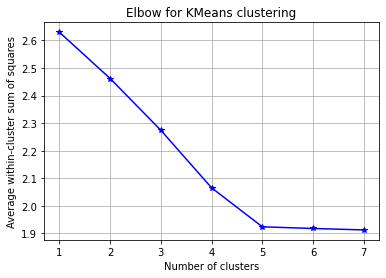

In [ ]:
elbow(changeS, range(1,8))

Each random state changes the elbow method a little bit as different groupings find local minima, but for every one, n=6 is the best result with the same average sum of squares

In [ ]:
rr=KMeans(n_clusters=5, n_init=10, random_state=0).fit(changeS)
rr.labels_ = rr.predict(changeS) #get labels

In [ ]:
change_asc_df['cluster_id'] = rr.labels_
change_asc_df['cluster_id'] = change_asc_df['cluster_id'].astype(str)

In [ ]:
change_asc_df.head()

,change_percentage_employed,change_civilian_labor_force_percentage,change_occupied,change_median_household_income,change_home_value_median,change_median_rent,change_percent_educated,change_not_pov,change_plus_75k,HH,HL,LH,LL,cluster_id
GEOID_x,,,,,,,,,,,,,,
1055010700,0.097740,0.102406,-0.014173,-0.028485,0.059838,-0.049724,0.305049,0.039583,-0.270058,0,0,0,1,4
1055001300,0.198335,0.059141,0.094765,-0.194453,-0.053834,0.061444,-0.504275,-0.109058,0.131842,0,0,0,1,4
1055000900,0.204038,0.079026,-0.126308,0.141660,0.335498,0.293893,-0.235706,0.339455,0.548847,0,1,0,0,3
1055001700,0.011797,0.034931,-0.072127,0.052129,-0.056027,0.079646,-0.108260,-0.063107,0.162348,0,0,0,0,1
1055010501,0.004606,0.011296,0.016602,0.112735,-0.001305,0.234600,0.120527,-0.035269,0.132720,0,0,0,0,1


In [ ]:
change_asc_df = pd.merge(change_asc_df, df1[['GEOID','INTPTLAT','INTPTLON','geometry']],
                         left_index=True,right_on='GEOID')

### 2016-2019: Interpreting Clusters **(Adjust Code Accordingly)**

In [ ]:
change_asc_df['cluster_id'].value_counts()

1    54487
2     7344
4     7020
3     2947
0     2203
Name: cluster_id, dtype: int64

Now we need to analyze the 5 groupings to find what they symbolize

In [ ]:
change_asc_df.columns

Index(['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k', 'HH',
       'HL', 'LH', 'LL', 'cluster_id', 'GEOID_x', 'INTPTLAT', 'INTPTLON',
       'Shape_Length', 'Shape_Area', 'GEOID_Data', 'geometry'],
      dtype='object')

In [ ]:
# Find general statistics for those areas with a positive score
mean_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].mean()).rename(columns={0:'mean'})

std_df=pd.DataFrame(data=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k']].std()).rename(columns={0:'std'})
stat_df=mean_df.merge(std_df, left_index=True,right_index=True)


In [ ]:
#Prepare statistics by cluster
clust=change_asc_df[['change_percentage_employed', 'change_civilian_labor_force_percentage',
       'change_occupied', 'change_median_household_income',
       'change_home_value_median', 'change_median_rent',
       'change_percent_educated', 'change_not_pov', 'change_plus_75k','cluster_id']].groupby(by='cluster_id').mean()
clust=clust.swapaxes('index','columns')
clust=clust.merge(stat_df, left_index=True,right_index=True)

#Normalize for graphing purposes
clust['norm0']=(clust['0']-clust['mean'])/clust['std']+1
clust['norm1']=(clust['1']-clust['mean'])/clust['std']+1
clust['norm2']=(clust['2']-clust['mean'])/clust['std']+1
clust['norm3']=(clust['3']-clust['mean'])/clust['std']+1
clust['norm4']=(clust['4']-clust['mean'])/clust['std']+1

In [ ]:
clust

,0,1,2,3,4,mean,std,norm0,norm1,norm2,norm3,norm4
change_percentage_employed,-0.022938,0.022951,0.065466,0.125231,-0.021077,0.025701,0.148970,0.673497,0.981543,1.266930,1.668120,0.685990
change_civilian_labor_force_percentage,-0.042167,-0.001686,0.032187,0.080776,-0.038498,0.000263,0.116491,0.635766,0.983276,1.274050,1.691160,0.667265
change_occupied,-0.001963,0.001975,0.006671,0.001577,-0.018200,0.000394,0.060778,0.961224,1.026010,1.103279,1.019456,0.694070
change_median_household_income,0.060231,0.135418,0.269287,0.222324,0.051812,0.141995,0.181509,0.549534,0.963765,1.701299,1.442560,0.503153
change_home_value_median,0.210798,0.146226,0.369392,0.121841,0.068405,0.161943,0.384025,1.127221,0.959075,1.540196,0.895576,0.756429
change_median_rent,0.077503,0.107995,0.202655,0.142786,0.063238,0.113621,0.187272,0.807134,0.969957,1.475426,1.155732,0.730961
change_percent_educated,0.042940,0.092137,0.178352,0.188854,0.045960,0.098699,0.333322,0.832717,0.980311,1.238965,1.270474,0.841777
change_not_pov,-0.007355,0.023155,0.058460,0.085705,-0.007495,0.025334,0.182228,0.820614,0.988044,1.181784,1.331295,0.819845
change_plus_75k,0.101902,0.222785,0.347770,0.468144,0.144844,0.233968,0.570751,0.768611,0.980408,1.199390,1.410295,0.843849


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=clust.norm0,theta=clust.index,fill='toself',name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=clust.norm1,theta=clust.index,fill='toself',name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=clust.norm2,theta=clust.index,fill='toself',name='Cluster 2'))
fig.add_trace(go.Scatterpolar(r=clust.norm3,theta=clust.index,fill='toself',name='Cluster 3'))
fig.add_trace(go.Scatterpolar(r=clust.norm4,theta=clust.index,fill='toself',name='Cluster 4'))
#fig.add_trace(go.Scatterpolar(r=clust.norm5,theta=clust.index,fill='toself',name='Cluster 5'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 2])),showlegend=True)

fig.show()

This radial chart shows us the relative values for each of the categories we clustered over. Values at a radius of 1 reflect the same average change as the country overall. Clusters 2 and 3 reflect positive change in economic conditions. Cluster 1 reflects a stationary tract. Clusters 0 and 4 reflect tracts in relative economic decline.

To avoid confusion, I will rename the tracts by their relative order of economic advancement:
- Cluster 4 --> Cluster 1
- Cluster 0 --> Cluster 2
- Cluster 1 --> Cluster 3
- Cluster 3 --> Cluster 4
- Cluster 2 --> Cluster 5

In [ ]:
clust0=clust[['4','0','1','3','2']].rename(columns={'0':'2','1':'3','2':'5','3':'4','4':'1'})
clust0

,1,2,3,4,5
change_percentage_employed,-0.021077,-0.022938,0.022951,0.125231,0.065466
change_civilian_labor_force_percentage,-0.038498,-0.042167,-0.001686,0.080776,0.032187
change_occupied,-0.018200,-0.001963,0.001975,0.001577,0.006671
change_median_household_income,0.051812,0.060231,0.135418,0.222324,0.269287
change_home_value_median,0.068405,0.210798,0.146226,0.121841,0.369392
change_median_rent,0.063238,0.077503,0.107995,0.142786,0.202655
change_percent_educated,0.045960,0.042940,0.092137,0.188854,0.178352
change_not_pov,-0.007495,-0.007355,0.023155,0.085705,0.058460
change_plus_75k,0.144844,0.101902,0.222785,0.468144,0.347770


In [ ]:
cluster_sorted=[]
for i in range(len(change_asc_df)):
  if change_asc_df.iloc[i].cluster_id=='0':
    cluster_sorted.append('2')
  elif change_asc_df.iloc[i].cluster_id=='1':
    cluster_sorted.append('3')
  elif change_asc_df.iloc[i].cluster_id=='2':
    cluster_sorted.append('5')
  elif change_asc_df.iloc[i].cluster_id=='3':
    cluster_sorted.append('4')
  elif change_asc_df.iloc[i].cluster_id=='4':
    cluster_sorted.append('1')
  

change_asc_df['cluster_sorted']=cluster_sorted


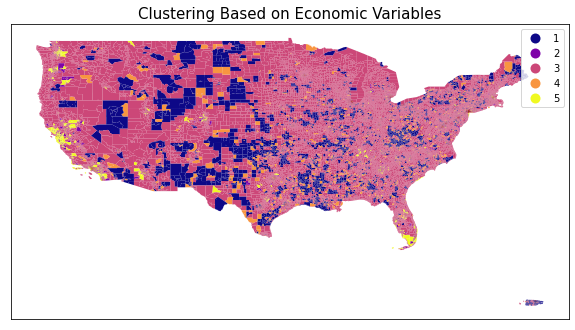

In [ ]:
# Clusters of Ascending Neighborhoods 
plotdf= gpd.GeoDataFrame(change_asc_df).loc[(change_asc_df.INTPTLON<-50)&
                                            (change_asc_df.INTPTLON>-130)]
plotdf.plot(figsize = (10,10), column='cluster_sorted',cmap ="plasma",legend=True)
plt.title("Clustering Based on Economic Variables", fontsize=15)
plt.grid(False)
plt.yticks([])
plt.xticks([])
plt.show()


In [ ]:
change_asc_df.to_csv('processed data/econ_16_to_19.csv')